# **回帰モデル作成グループ演習**
# チーム名：神東（かんとう）連合 (チームB)

## 内容： データ分析、モデル作成、評価 Jupyter Notebook (Sample Program)
## 編集日（バージョン）: 2023/12/23 rev.1.0 (Sample Program)
## 路線価分析評価（Street Value）
## チーム内データ分析・整理シート：  
https://docs.google.com/spreadsheets/d/1JP2wMSZCfTcJx5RSyw5rWFAyZjlyLt6gRJYLNBeepQc/edit?usp=drive_web&ouid=116788829489572798917

#Washington D.C.の物件価格推定コンペ  
[URL] : https://www.kaggle.com/t/2a2ed13d9eae4358a1c94d894d28a821  

このチャレンジの目的は、ワシントンDCの不動産の様々な特徴と、それらが販売価格に与える影響を探ることによって、不動産の価格を予測することである。  

目標  
各物件の販売価格を予測する。テストセットの各 Id について、PRICE 変数の値を予測しなければならない。

評価基準  
提出物は、予測値の対数と観察された販売価格の対数の間の RMSE (Root-Mean-Squared-Error) で評価されます。(対数をとるということは、高価な家屋と安価な家屋を予測する際の誤差が、同じように結果に影響することを意味します)。

[Data] :  https://www.kaggle.com/competitions/property-price-prediction-challenge-3rd-closed/data

Challenge Description  
The aim of this challenge is to predict the prices of properties in Washington DC by exploring the various characteristics of properties and their effect on the sales price. The dataset provided consists of 47 explanatory variables describing various aspects of residential homes. This dataset contains information on real property sales for sales between May 1947 to December 2017 for properties located in Washington DC.  
このチャレンジの目的は、ワシントンDCの不動産の様々な特徴と、それらが販売価格に与える影響を探ることによって、不動産の価格を予測することである。提供されるデータセットは、住宅の様々な側面を記述する47の説明変数で構成される。このデータセットには、ワシントンDCに所在する不動産について、1947年5月から2017年12月までの不動産販売に関する情報が含まれています。

Goal  
Predict the sales price for each property. For each Id in the test set, you must predict the value of the PRICE variable.  
目標  
各物件の販売価格を予測する。テストセットの各 Id について、PRICE 変数の値を予測しなければならない。

Metric  
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)  
評価基準  
提出物は、予測値の対数と観察された販売価格の対数の間の RMSE (Root-Mean-Squared-Error) で評価されます。(対数をとるということは、高価な家屋と安価な家屋を予測する際の誤差が、同じように結果に影響することを意味します)。


---
# 回帰モデル作成評価サンプルプログラム
---

# 事前環境設定

In [ ]:
# ライブラリのインストール（1）初回インストール

!pip install pandas
# ---- 追記メモ ----
# Google colaboratory は 1.5.3の模様
# ローカル環境では最新バージョンなので、このサンプルでは1.5.3に合わせておく必要がある
# pandas の corr関数でエラーが出たり、get_dummies関数で、Pandas 2.0.0からは、1,0ではなく真偽値型すなわちTrue,Falseが入る。
#!pip install pandas==1.5.3
# -----------------
!pip install numpy
!pip install scipy

!pip install statsmodels
!pip install scikit-learn

!pip install seaborn
!pip install matplotlib


In [ ]:
# (注意）ライブラリのインストール(2) Google Colaboratoryの場合、再度Notebookを開くたびに実施が必要
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0b5833bf464cd39ca2dc35d34b5ee3281195741cff3ef7b360cc1b1be48246a9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# インストールされたpythonのモジュールを確認(バージョン確認など必要があれば)
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
# ライブラリの読み込み（初回および再起動時）
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import norm
import math
# import pandas_profiling as pdp
# グラフをインラインで表示させる
%matplotlib inline

# 入力データの準備

## Pythonのカレントディレクトリを確認し、分析データをコピーする。  
マウントする（利用する）先のフォルダ（このNotebookを配置するフォルダ）の  

./data/  
に元データを保存しておく  

DC_train.csv  
DC_test.csv  
DC_output_sample.csv  
raw_address_points.csv  
raw_census_tracts_in_2010.csv  

提出（submit）するデータは   
./submit/  
に出力するため、このディレクトリも作成しておく。  


In [ ]:
# Pythonのカレントディレクトリを確認
os.getcwd()

In [ ]:
# Google Colaboratory, Google Drive利用時に、マウントエラーが出る場合に実行してみる
%cd /content

/content


In [ ]:
# Google Driveにマウントして、ここからデータを読む場合
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# ドライブのマウント（カレントディレクトリの移動）（マウント先は状況に合わせて設定）
# %cd drive/MyDrive/Regression/Model/
%cd /content/drive/Shareddrives/TeamB/Notebook

/content/drive/Shareddrives/TeamB/Notebook


In [ ]:
#移動した先のディレクトリ内の表示
!ls

# データの読み込み

In [ ]:
# read_csv()で分析データ（train.csv）を読込。 必要に応じ、delimiterで区切り文字を指定する。デフォルトでは","。
# df_train = pd.read_csv('カレントディレクトリ/data/ファイル名', delimiter=",") ）
df_train = pd.read_csv('./data/DC_train.csv')
df_test = pd.read_csv('./data/DC_test.csv')
df_address = pd.read_csv('./data/raw_address_points.csv')
df_census = pd.read_csv('./data/raw_census_tracts_in_2010.csv')
df_out_sample = pd.read_csv('./data/DC_output_sample.csv')

<ipython-input-8-396b9e954f2c>:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_address = pd.read_csv('./data/raw_address_points.csv')


# Sample Program
(1) CensusTractsを読み込み、trainデータに結合する前処理部分と  
(2) Residential/Condominiumとに分けて、別モデルでフィッテングする部分とに大きく分けている。  
(2) では、trainデータをランダムサンプリングで学習データと検証データに分けることもできるようにしている。  
条件にもよるかもしれないが、全データでモデル生成する方が精度が良いようである。  
切替フラグ：
* useCensusTracts  
* useRandomSampling   
* useSkLearn  

In [ ]:
# センサスTRACの紐付処理
#　　df_train_add_censustracts　# trainデータと結合したデータを書きの変数で参照できる
#    df_test_add_censustracts　 # testデータと結合したデータを書きの変数で参照できる

# train"の[CENSUS_TRACT]と"国勢調査TRACT"の[TRACT]を結合
df_train  = pd.read_csv('./data/DC_train.csv')
df_test   = pd.read_csv('./data/DC_test.csv')
df_census = pd.read_csv('./data/raw_census_tracts_in_2010.csv')

# カラム名を揃えるためrename（trainのCENSUS＿TRUCTをcensus_tractのTRUCTに合わせる）
df_train_add_censustracts = df_train.rename(columns = {'CENSUS_TRACT' : 'TRACT'}).copy()
df_test_add_censustracts  = df_test.rename(columns = {'CENSUS_TRACT' : 'TRACT'}).copy()

# 利用するセンサスデータの選択
# 利用する項目のコメント #　を外すと、結合の際に取り込まれる。

census_coloumns = [
'TRACT',      #1 国勢調査トラクト
#'GEOID',       #2 ゲオイド
'P0010001',   #3 総人口
'P0010002',   #4 人種別総人口
'P0010003',   #5 白人1人種人口
'P0010004',   #6 黒人の1人種人口
#'P0010005',    #7 アメリカ系インディアン・アラスカ人の1種族の人口
#'P0010006',    #8 アジア系1人種人口
#'P0010007',    #9 パシフィック・アイランダー（太平洋諸島出身者）単一民族の人口
#'P0010008',    #10 その他1人種の人口
#'OP000001',    #11 黒人と黒人の2人種以上の人口
#'OP000002',    #12 アメリカ・インディアンおよび先住民の2人種以上の人口
#'OP000003',    #13 アジア系およびその他の2人種以上の人口
#'OP000004',    #14 太平洋島民と2人種以上の人口
#'P0020002',    #15 ヒスパニック系住民総数
#'P0020005',    #16 非ヒスパニック系白人人口合計
#'P0020006',    #17 黒人のうちヒスパニック系以外の人口
#'P0020007',    #18 アメリカ系インディアンの人口
#'P0020008',    #19 アジア系非ヒスパニック単一民族人口
#'P0020009',    #20 人種的に単一である太平洋諸島出身者の、スペイン系住民の人口ではない
#'P0020010',    #21 ヒスパニック系でないその他の人種
#'OP00005',     #22 黒人およびその他の2人種から成る人口が、ヒスパニック系ではない
#'OP00006',     #23 アメリカ・インディアンおよび先住民の2人種以上の人口を持つヒスパニック系ではない
#'OP00007',     #24 アジア系およびその他の2人種間の人口に占める ヒスパニック系ではない
#'OP00008',     #25 パシフィック・アイランダーおよび太平洋諸島出身者の2人種以上の人口がヒスパニック系でない
#'P0030001',    #26 18歳以上の成人総人口
#'P0030003',    #27 白色人種の成人人口
#'P0030004',    #28 成人人口のうち黒色人種が1つの人口
#'P0030005',    #29 アメリカ系インディアンの 成人人口
#'P0030006',    #30 アジア系住民（単一民族）の成人人口
#'P0030007',    #31 成人人口のうち太平洋諸島出身者が1人の人種
#'P0030008',    #32 その他の人種1人の成人人口
#'OP00009',     #33 黒人と黒人の2人種以上の成人人口
#'OP00010',     #34 アメリカ系およびインド系の2人種以上の成人人口
#'OP00011',     #35 アジア系およびその他の2人種以上の成人人口
#'OP00012',     #36 成人の2人種以上の人口 太平洋島民および
#'P0040002',    #37 ヒスパニック系の成人人口
#'P0040005',    #38 白人の非ヒスパニック系成人人口
#'P0040006',    #39 成人の単一人種黒人以外の人口
#'P0040007',    #40 米系インディアンの非ヒスパニック系 成人人口
#'P0040008',    #41 成人非ヒスパニック単一人種アジア人
#'P0040009',    #42 成人、非ヒスパニック（単一人種）、太平洋諸島出身者
#'P0040010',    #43 成人、非ヒスパニック、その他の人種
#'OP000013',    #44 成人で2人種以上の黒人および
#'OP000014',    #45 成人の非ヒスパニック 2人種以上のアメリカン・インディアンおよび
#'OP000015',    #46 アジア人で2人種以上の非ヒスパニック成人
#'OP000016',    #47 成人の非ヒスパニック2人種以上太平洋諸島民および
'H0010001',    #48 総住宅戸数
'H0010002',    #49 入居中の住宅戸数
'H0010003',    #50 空き家戸数
#'ACRES',             #51 エーカー
#'SQ_MILES',          #52 平方マイル
#'Shape_Length',      #53 形状の長さ
#'Shape_Area',        #54 形状面積
#'FAGI_TOTAL_2010',   #55 2010年の連邦調整総所得の合計
'FAGI_MEDIAN_2010',  #56 2010年度連邦調整総所得中央値
#'FAGI_TOTAL_2013',   #57 2013年の連邦調整総所得の合計。
'FAGI_MEDIAN_2013',  #58 2013年の連邦調整総所得中央値
#'FAGI_TOTAL_2011',   #59 2011年の連邦調整総所得合計
'FAGI_MEDIAN_2011',  #60 2011年連邦調整総所得中央値
#'FAGI_TOTAL_2012',   #61 2012年の連邦調整総所得合計
'FAGI_MEDIAN_2012',  #62 2012年度連邦調整総所得中央値
#'FAGI_TOTAL_2014',   #63 2014年の連邦調整総所得合計
'FAGI_MEDIAN_2014',  #64 2014年の連邦調整総所得中央値
#'FAGI_TOTAL_2015',   #65 015年の連邦調整総所得合計
'FAGI_MEDIAN_2015',  #66 2015年の連邦調整総所得中央値
]

# 利用するセンサスデータの絞り込み
df_census_selected = df_census[census_coloumns]

# 'TRACT'をキーにして結合、結合後 renameしてキーをCENSUS＿TRACTに戻す
# how = のデフォルトではinner
df_train_add_censustracts = pd.merge(df_train_add_censustracts, df_census_selected, on='TRACT', how = 'left').copy()
df_train_add_censustracts = df_train_add_censustracts.rename(columns = {'TRACT' : 'CENSUS_TRACT'})

df_test_add_censustracts = pd.merge(df_test_add_censustracts, df_census_selected, on='TRACT', how = 'left').copy()
df_test_add_censustracts = df_test_add_censustracts.rename(columns = {'TRACT' : 'CENSUS_TRACT'})

pd.set_option('display.max_columns', 120)

# 結合したデータの一部表示
dispData = True
if dispData:
    print(df_train_add_censustracts.shape)
    display(df_train_add_censustracts.head(10))
    print(df_test_add_censustracts.shape)
    display(df_test_add_censustracts.head(10))


(82653, 62)


,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,P0010001,P0010002,P0010003,P0010004,H0010001,H0010002,H0010003,FAGI_MEDIAN_2010,FAGI_MEDIAN_2013,FAGI_MEDIAN_2011,FAGI_MEDIAN_2012,FAGI_MEDIAN_2014,FAGI_MEDIAN_2015
0,0,1,0,Hot Water Rad,N,1.0,6,3,1929.0,NaN,1954,2.00,1982-06-11,Q,1,1088.0,1,2 Story,Semi-Detached,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,13,1789,2018-07-22 18:01:43,Residential,NaN,NaN,612 TEWKESBURY PLACE NW,WASHINGTON,DC,20012.0,18S UJ 24842 15144,38.967772,-77.021797,Brightwood,006 D Brightwood,1901.0,001901 4012,Ward 4,3197,-77.021356,38.967781,NW,60000.0,4016,3887,424,3023,1603,1503,100,36750.00,37420.0,35486.0,38108.0,41377.0,42401.0
1,1,1,1,Warm Cool,Y,1.0,7,3,1940.0,NaN,1947,2.50,1984-05-31,U,3,1276.0,1,2.5 Story Fin,Single,Above Average,Average,Common Brick,Slate,Hardwood,1.0,1,12,4193,2018-07-22 18:01:43,Residential,NaN,NaN,4317 20TH STREET NE,WASHINGTON,DC,20018.0,18S UJ 28755 12246,38.942446,-76.975936,Michigan Park,NaN,9400.0,009400 1008,Ward 5,4232,-76.974953,38.942327,NE,75500.0,4163,4038,370,3467,1792,1651,141,48688.00,49363.5,48019.0,49071.0,51938.5,52796.5
2,2,1,0,Forced Air,N,1.0,6,2,1947.0,NaN,1957,2.00,1984-07-20,Q,2,918.0,1,2 Story,Semi-Detached,Average,Average,Common Brick,Comp Shingle,Hardwood,1.0,0,13,2464,2018-07-22 18:01:43,Residential,NaN,NaN,180 FORRESTER STREET SW,WASHINGTON,DC,20032.0,18S UH 25334 99286,38.825053,-77.012084,Congress Heights,016 A Congress Heights,9807.0,009807 2009,Ward 8,6239,-77.009976,38.824595,SW,40000.0,3072,3022,56,2937,1551,1350,201,31540.43,29196.0,29574.5,29638.0,28837.0,30509.0
3,3,3,0,Hot Water Rad,N,1.0,6,3,1925.0,NaN,1950,2.75,1985-08-05,Q,3,1700.0,1,3 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwood,1.0,0,11,1876,2018-07-22 18:01:43,Residential,NaN,NaN,2753 WOODLEY PLACE NW,WASHINGTON,DC,20008.0,18S UJ 22127 10659,38.926829,-77.051948,Garfield,NaN,501.0,000501 1007,Ward 3,2206,-77.051444,38.926412,NW,173000.0,3376,3267,2853,124,2186,2027,159,65919.00,68973.0,64763.5,70218.0,72707.0,76949.5
4,4,1,0,Wall Furnace,Y,NaN,3,1,1918.0,1979.0,1918,NaN,1986-06-10,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,235,2018-07-22 18:01:38,Condominium,1233.0,585.0,NaN,NaN,NaN,20010.0,NaN,38.934151,-77.037394,Mt. Pleasant,036 A Mt. Pleasant,2701.0,NaN,Ward 1,2622,-77.037396,38.934158,NW,5400.0,5233,4989,2828,1281,2845,2655,190,35394.50,42690.0,39237.0,41223.5,43441.0,47231.0
5,5,1,2,Warm Cool,Y,1.0,6,3,1977.0,1985.0,1983,3.00,1986-12-02,Q,1,1870.0,1,3 Story,Row End,Average,Average,Shingle,Shake,Hardwood,1.0,0,11,1159,2018-07-22 18:01:43,Residential,NaN,NaN,1910 1/2 NAYLOR ROAD SE,WASHINGTON,DC,20020.0,18S UJ 28470 04560,38.873170,-76.977293,Anacostia,002 B Anacostia,7601.0,007601 1004,Ward 8,5565,-76.976512,38.872954,SE,89000.0,4355,4285,140,4109,2196,1855,341,28653.00,29757.0,28397.0,29717.0,30483.5,30846.0
6,6,1,0,Forced Air,Y,NaN,4,1,1957.0,1978.0,1957,NaN,1988-04-13,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,260,2018-07-22 18:01:38,Condominium,3004.0,826.0,NaN,NaN,NaN,20015.0,NaN,38.961282,-77.075658,Chevy Chase,011 A Chevy Chase,1100.0,NaN,Ward 3,1857,-77.075660,38.961289,NW,80500.0,4779,4641,4012,290,2234,2118,116,101389.00,88358.0,97280.0,97640.0,113046.0,114189.5
7,7,2,0,Hot Water Rad,N,1.0,7,4,1923.0,NaN,1957,2.00,1988-12-11,U,1,1720.0,1,2 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Hardwood,1.0,1,11,2100,2018-07-22 18:01:43,Residential,NaN,NaN,3527 HERTFORD PLACE NW,WASHINGTON,DC,20010.0,18S UJ 23554 11560,38.935232,-77.035730,Columbia Heights,015 A Columbia Heights,2801.0,002801 2004,Ward 1,2686,-77.035527,38.935405,NW,140000.0,3773,3602,1241,1359,1820,1646,17

(7493, 61)


,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,P0010001,P0010002,P0010003,P0010004,H0010001,H0010002,H0010003,FAGI_MEDIAN_2010,FAGI_MEDIAN_2013,FAGI_MEDIAN_2011,FAGI_MEDIAN_2012,FAGI_MEDIAN_2014,FAGI_MEDIAN_2015
0,82653,1,1,Hot Water Rad,N,1.0,6,3,1939.0,NaN,1950,2.0,2017-01-03,Q,2,1080.0,1,2 Story,Row End,Above Average,Average,Common Brick,Comp Shingle,Hardwood,1.0,0,11,2850,2018-07-22 18:01:43,Residential,NaN,NaN,1909 T STREET SE,WASHINGTON,DC,20020.0,18S UJ 28491 03908,38.867298,-76.976887,Randle Heights,043 A Randle Heights,7605.0,007605 1001,Ward 8,5617,-76.976920,38.867674,SE,3447,3380,47,3292,1804,1581,223,31064.0,29971.0,30825.5,30292.0,31643.0,31588.5
1,82654,1,0,Forced Air,Y,NaN,4,1,1916.0,1979.0,1916,NaN,2017-01-03,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,236,2018-07-22 18:01:38,Condominium,1098.0,945.0,NaN,NaN,NaN,20008.0,NaN,38.912848,-77.048179,Kalorama,029 A Kalorama,4100.0,NaN,Ward 2,2514,-77.048182,38.912856,NW,2708,2646,2261,115,1702,1494,208,87019.0,81283.5,85405.0,89643.0,100196.0,100885.0
2,82655,1,0,Ht Pump,Y,NaN,3,1,2009.0,NaN,2009,NaN,2017-01-03,Q,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,107,2018-07-22 18:01:38,Condominium,2972.0,787.0,NaN,NaN,NaN,20003.0,NaN,38.877779,-77.006983,Old City 1,039 E Old City 1,7200.0,NaN,Ward 6,699,-77.006985,38.877787,SE,2794,2709,1670,862,2370,1830,540,64030.0,70045.0,70485.5,74226.0,64040.0,69664.0
3,82657,1,0,Forced Air,Y,NaN,2,0,1891.0,1983.0,1891,NaN,2017-01-03,Q,5,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,85,2018-07-22 18:01:38,Condominium,2212.0,522.0,NaN,NaN,NaN,20005.0,NaN,38.908871,-77.035280,Old City 2,040 E Old City 2,5201.0,NaN,Ward 2,195,-77.035283,38.908879,NW,6077,5878,4398,775,4548,4200,348,66130.0,75149.0,70538.0,73528.0,76106.5,81647.5
4,82658,1,0,Ht Pump,Y,NaN,3,1,2016.0,NaN,2016,NaN,2017-01-03,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,179,2018-07-22 18:01:38,Condominium,5335.0,554.0,NaN,NaN,NaN,20005.0,NaN,38.907546,-77.028773,Old City 2,040 C Old City 2,5002.0,NaN,Ward 2,280,-77.028776,38.907553,NW,6021,5799,3225,1152,3853,3475,378,39733.0,53208.0,48270.5,51141.0,53829.0,59810.5
5,82659,2,1,Forced Air,Y,1.0,7,3,2013.0,NaN,2015,3.0,2017-01-03,Q,3,1485.0,1,3 Story,Row End,Above Average,Very Good,Vinyl Siding,Comp Shingle,Hardwood/Carp,1.0,0,11,2048,2018-07-22 18:01:43,Residential,NaN,NaN,1423 TOBIAS DRIVE SE,WASHINGTON,DC,20020.0,18S UJ 27881 02012,38.850106,-76.983437,Randle Heights,043 D Randle Heights,7404.0,007404 2002,Ward 8,5885,-76.983307,38.849820,SE,3310,3246,41,3165,1308,1106,202,26372.0,24785.5,26176.0,25212.0,25068.0,25906.5
6,82660,1,0,Warm Cool,Y,1.0,6,3,1951.0,1979.0,1961,2.0,2017-01-03,Q,2,1188.0,1,2 Story,Semi-Detached,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,13,2875,2018-07-22 18:01:43,Residential,NaN,NaN,26 55TH STREET SE,WASHINGTON,DC,20019.0,18S UJ 33264 06223,38.889069,-76.922460,Deanwood,018 C Deanwood,9903.0,009903 2000,Ward 7,5283,-76.921675,38.888099,SE,1851,1809,17,1774,722,644,78,33233.5,33430.0,32154.0,33445.5,33897.0,36360.5
7,82662,1,0,Forced Air,Y,NaN,3,1,1967.0,NaN,1967,NaN,2017-01-03,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,772,2018-07-22 18:01:38,Condominium,2416.0,719.0,NaN,NaN,NaN,20007.0,NaN,38.910098,-77.087175,Palisades,041 B Palisades,802.0,NaN,Ward 3,1367,-77.087177,38.910105,NW,2869,2775,2390,107,1423,1336,87,89712.5,78663.0,83610.0,84441.0,94580.0,94907.0
8,82663,1,0,Ht Pump,Y,NaN,3,1,2016.0,NaN,2016,NaN,2017-01-03,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,179,2018-07-22 18:01:38,Condominium,5335.0,630.0,NaN,NaN,NaN,20005.0,NaN,38.907546,-77.028773,Old City 2,040 C Old City 2,5002.0,NaN,Ward 2,280,-77.028776,38.907553,NW,6021,5799

In [ ]:
#
# -----------------------------------------------------------
#  Logistic Re
#  SALEDATE Year Month, Census Tracts extension
# -----------------------------------------------------------
#

pd.set_option('display.max_columns', 120)
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# センサスデータを結合して使うか
#useCensusTracts = True
useCensusTracts = False

if useCensusTracts:
    print('**** CENSUS TRACTS DETAIL VALUE USED ******')
    dataset_train = df_train_add_censustracts.copy()
    dataset_test = df_test_add_censustracts.copy()
else:
    print('**** USE CENSUS TRACTS DETAIL VALUE ! NOT USED ******')
    df_train = pd.read_csv('./data/DC_train.csv')
    dataset_train = df_train.copy()
    df_test = pd.read_csv('./data/DC_test.csv')
    dataset_test = df_test.copy()

target_col = 'PRICE'
source     = 'SOURCE' # 戸建て、マンション識別変数

print(df_train.shape)
print(df_test.shape)
# train, test 結合
concat_flag = '__concat__'           # trainかtestかを識別するフラグ
dataset_train[concat_flag]  = 1      # trainデータには 1 をセット
dataset_test[concat_flag]   = 0      # testデータには  0 をセット
dataset_all = pd.concat([dataset_train, dataset_test])

# 変数加工追加
# SALSEDATE 年月分離、変数化
var_sale_date  = 'SALEDATE'
var_sale_year  = 'SALEDATE_y'
var_sale_month = 'SALEDATE_m'

# date型に変換して新しい列を追加
dataset_all[var_sale_year]  = pd.to_datetime(dataset_all[var_sale_date])
dataset_all[var_sale_month] = pd.to_datetime(dataset_all[var_sale_date])

# dataset_all[var_sale_year]  = dataset_all[var_sale_year].dt.strftime('%Y')   # 文字列
dataset_all[var_sale_year]  = dataset_all[var_sale_year].dt.year               # 数値
dataset_all[var_sale_month] = dataset_all[var_sale_month].dt.month # -> 1,2, .....,11,12

# カテゴリ結合処理（実施していない）

# train, test　分離
dataset_train = dataset_all[dataset_all[concat_flag] == 1]
dataset_train = dataset_train.drop(concat_flag, axis=1)
dataset_test  = dataset_all[dataset_all[concat_flag] == 0]
dataset_test  = dataset_test.drop(concat_flag, axis=1)


# カテゴリ変数処理のため、trainデータとテストデータを結合して、利用する全データを一旦作成しておく
X_all   = dataset_all.drop(columns=[target_col, concat_flag])

# データを戸建てとマンションとに分割する
X_all_r = X_all[X_all[source] == 'Residential']
X_all_c = X_all[X_all[source] == 'Condominium']

train_r = dataset_train[dataset_train[source] == 'Residential'].copy()
train_c = dataset_train[dataset_train[source] == 'Condominium'].copy()

X_test_r = dataset_test[dataset_test[source] == 'Residential'].copy()
X_test_c = dataset_test[dataset_test[source] == 'Condominium'].copy()

# 目的変数と説明変数のベースに分ける
X_r = train_r.drop(columns=[target_col])
y_r = train_r[target_col]

X_c = train_c.drop(columns=[target_col])
y_c = train_c[target_col]

# --------------------------------------------------------------------------------
# ランダムサンプリング：
# useRandomSampling = True
#    学習データのうちsample_weightで指定した残りを検証用としてランダムサンプリングする
# useRandomSampling = False
#    学習データをすべて使い、検証用処理は行わない
# --------------------------------------------------------------------------------
useRandomSampling = False
if useRandomSampling:
    sample_weight = 0.7
    train_train_r, train_valid_r, y_train_r, y_valid_r = train_test_split(X_r, y_r, train_size=sample_weight, random_state=4)
    train_train_c, train_valid_c, y_train_c, y_valid_c = train_test_split(X_c, y_c, train_size=sample_weight, random_state=4)
else:
    train_train_r = X_r
    y_train_r = y_r
    train_train_c = X_c
    y_train_c = y_c

# 説明変数の選択
num_cols_r = []
cat_cols_r = []
use_cols_r = []

num_cols_c = []
cat_cols_c = []
use_cols_c = []

# ----------------------------
#    カスタマイズする箇所
# ----------------------------
if useCensusTracts:  # センサスデータ（切り出した変数）を使う場合
    # Residentialモデル用
    #num_cols_r = ['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'AYB', 'EYB']
    #num_cols_r = ['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'EYB', 'SALEDATE_y', 'SALEDATE_m']
    num_cols_r = ['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'EYB',  'SALEDATE_y', 'SALEDATE_m', 'P0010001', 'P0010002', 'P0010003', 'P0010004','H0010001', 'H0010002', 'H0010003']

    cat_cols_r = ['GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'ZIPCODE']
    #cat_cols_r = ['HEAT', 'GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'ZIPCODE']
    #cat_cols_r = ['HEAT', 'QUALIFIED', 'GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'ZIPCODE']

    use_cols_r = num_cols_r + cat_cols_r

    # Condominiumモデル用
    #num_cols_c = ['LIVING_GBA', 'ROOMS','EYB']
    #num_cols_c = ['LIVING_GBA', 'ROOMS', 'EYB', 'SALEDATE_y', 'SALEDATE_m']
    num_cols_c = ['LIVING_GBA', 'ROOMS', 'EYB', 'SALEDATE_y', 'SALEDATE_m', 'P0010001', 'P0010002', 'P0010003', 'P0010004', 'H0010001', 'H0010002','H0010003']

    cat_cols_c = ['ASSESSMENT_NBHD', 'ZIPCODE']
    #cat_cols_c = ['HEAT', 'ASSESSMENT_NBHD', 'ZIPCODE']
    #cat_cols_c = ['HEAT', 'QUALIFIED', 'ASSESSMENT_NBHD', 'ZIPCODE']

    use_cols_c = num_cols_c + cat_cols_c

else:  # センサスデータ（切り出した変数）を使わない場合
    # Residentialモデル用
    #num_cols_r = ['GBA', 'LANDAREA', 'EYB']
    #num_cols_r = ['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'EYB']
    num_cols_r = ['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'EYB', 'SALEDATE_y', 'SALEDATE_m']

    #cat_cols_r = ['GRADE', 'CNDTN', 'HEAT', 'AC', 'QUALIFIED']
    cat_cols_r = ['GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'CENSUS_TRACT', 'ZIPCODE']

    use_cols_r = num_cols_r + cat_cols_r

    # Condominiumモデル用
    #num_cols_c = ['LIVING_GBA','EYB']
    #num_cols_c = ['LIVING_GBA', 'ROOMS','EYB']
    num_cols_c = ['LIVING_GBA', 'ROOMS', 'EYB', 'SALEDATE_y', 'SALEDATE_m']

    #cat_cols_c = ['ASSESSMENT_NBHD', 'CENSUS_TRACT', 'ZIPCODE', 'HEAT', 'AC', 'QUALIFIED']
    cat_cols_c = ['ASSESSMENT_NBHD', 'CENSUS_TRACT', 'ZIPCODE']

    use_cols_c = num_cols_c + cat_cols_c

# 変数絞り込み
# 学習データ
X_train_r = train_train_r[use_cols_r]
X_train_c = train_train_c[use_cols_c]
# 検証データ
if useRandomSampling:
    X_valid_r = train_valid_r[use_cols_r]
    X_valid_c = train_valid_c[use_cols_c]
# テストデータのResidentialとCondominium
X_test_r = X_test_r[use_cols_r]
X_test_c = X_test_c[use_cols_c]

# 欠損値処理
# Residentialの欠損値処理
X_train_r.loc[X_train_r['GBA'].isnull(), 'GBA']            = X_train_r['GBA'].mean()                 # 平均値
X_train_r.loc[X_train_r['LANDAREA'].isnull(), 'LANDAREA']  = X_train_r['LANDAREA'].mean()            # 平均値
#X_train_r.loc[X_train_r['AYB'].isnull(), 'AYB']            = X_train_r['EYB']                       # EYBに置き換え

X_train_r.loc[X_train_r['GRADE'].isnull(), 'GRADE'] = 'NA'                                            # NA（仮）
X_train_r.loc[X_train_r['CNDTN'].isnull(), 'CNDTN'] = 'NA'                                            # NA（仮）
X_train_r.loc[X_train_r['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                        # NA（欠損値元々なし？要確認）

if useRandomSampling:
    X_valid_r.loc[X_valid_r['GBA'].isnull(), 'GBA'] = X_valid_r['GBA'].mean()                         # 平均値
    X_valid_r.loc[X_valid_r['LANDAREA'].isnull(), 'LANDAREA']  = X_valid_r['LANDAREA'].mean()         # 平均値
    #X_valid_r.loc[X_valid_r['AYB'].isnull(), 'AYB']            = X_valid_r['EYB']                    # EYBに置き換え
    # Residentialのvalidationの欠損値処理
    X_valid_r.loc[X_valid_r['GRADE'].isnull(), 'GRADE'] = 'NA'                                        # NA（仮）
    X_valid_r.loc[X_valid_r['CNDTN'].isnull(), 'CNDTN'] = 'NA'                                        # NA（仮）
    X_valid_r.loc[X_valid_r['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                    # NA（欠損値元々なし？要確認）

if useCensusTracts: # Residentialの場合のセンサスデータの欠損値処理
    pass  # 今のところ不要

# Condominiumの全データの欠損値処理
X_c.loc[X_c['LIVING_GBA'].isnull(), 'LIVING_GBA']  = X_c['LIVING_GBA'].mean()                         # 平均値
X_c.loc[X_c['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                                    # NA（欠損値元々なし？要確認）
# Condominiumのsampleの欠損値処理
X_train_c.loc[X_train_c['LIVING_GBA'].isnull(), 'LIVING_GBA']  = X_train_c['LIVING_GBA'].mean()       # 平均値
X_train_c.loc[X_train_c['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                        # NA（欠損値元々なし？要確認）

if useRandomSampling:
    # Condominiumのvalidationの欠損値処理
    X_valid_c.loc[X_valid_c['LIVING_GBA'].isnull(), 'LIVING_GBA']  = X_valid_c['LIVING_GBA'].mean()   # 平均値
    X_valid_c.loc[X_valid_c['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                    # NA（欠損値元々なし？要確認）

if useCensusTracts: # Condominiumの場合のセンサスデータの欠損値処理
    pass  # 今のところ不要

#
# 外れ値処理（実施していない）
# 外れ値を含む行削除

# カテゴリ変数処理（実施していない）
# カテゴリ結合
# var = 'CNDTN'
# A = df_train.copy()
# A.loc[(A[var] != 'Excellent') & (A[var] != 'Very Good') & (A[var] != 'Good'), var] ='Other'

# カテゴリ変数化（dummy()変数の前処理）
var_categories_r = {}
for col in cat_cols_r:
    var_categories_r[col] = sorted(X_all_r[col].unique())  # train, test全データでユニークな値
    X_train_r[col] = pd.Categorical(X_train_r[col], categories=var_categories_r[col])
#X_train_r = pd.get_dummies(X_train_r, drop_first=True) # エンコーディング
X_train_r = pd.get_dummies(X_train_r)

var_categories_c = {}
for col in cat_cols_c:
    var_categories_c[col] = sorted(X_all_c[col].unique()) # train, test全データでユニークな値
    X_train_c[col] = pd.Categorical(X_train_c[col], categories=var_categories_c[col])
#X_train_c = pd.get_dummies(X_train_c, drop_first=True)
X_train_c = pd.get_dummies(X_train_c)

# データの表示
print(var_categories_r)
display(X_train_r.head())
print(var_categories_c)
display(X_train_c.head())

# 対数をとってモデル化
y_train_r = np.log(y_train_r)
y_train_c = np.log(y_train_c)

# sklearnを使うが、satemodelも選べるようにした
from sklearn.linear_model import LinearRegression
useSkLearn = True
if useSkLearn:
    reg_r = LinearRegression()                    # Residential用モデル
    reg_r.fit(X_train_r, y_train_r)               # フィッティング
    y_pred_train_r = reg_r.predict(X_train_r)     # 学習データの予測

    reg_c = LinearRegression()                    # Condominium用モデル
    reg_c.fit(X_train_c, y_train_c)               # フィッティング
    y_pred_train_c = reg_c.predict(X_train_c)     # 学習データの予測

else:  # use StateModel
    X_train_r = sm.add_constant(X_train_r)        # 定数項の付与
    model_r = sm.OLS(y_train_r, X_train_r).fit()  # フィッティング
    y_pred_train_r = model_r.predict(X_train_r)   # 学習データの予測
    # model_r.summary()
    X_train_c = sm.add_constant(X_train_c)
    model_c = sm.OLS(y_train_c, X_train_c).fit()
    y_pred_train_c = model_c.predict(X_train_c)   #
    # model_c.summary()

score_r = rmse(y_train_r, y_pred_train_r)   # 残差計算
score_c = rmse(y_train_c, y_pred_train_c)   # 残差計算

# 検証用データ処理
if useRandomSampling:
    y_valid_r = np.log(y_valid_r)  # 検証用のyも対数をとる

    for key, value in var_categories_r.items():
        X_valid_r[key] = pd.Categorical(X_valid_r[key], categories=value) # ここでエラーが出る場合は、カテゴリ変数の欠損値処理ができていない
    #X_valid_r = pd.get_dummies(X_valid_r, drop_first=True)  # エンコーディング
    X_valid_r = pd.get_dummies(X_valid_r)

    y_valid_c = np.log(y_valid_c)  # 検証用のyも対数をとる
    for key, value in var_categories_c.items():
        X_valid_c[key] = pd.Categorical(X_valid_c[key], categories=value) # ここでエラーが出る場合は、カテゴリ変数の欠損値処理ができていない
    #X_valid_c = pd.get_dummies(X_valid_c, drop_first=True)
    X_valid_c = pd.get_dummies(X_valid_c)

    if useSkLearn:
        y_pred_valid_r = reg_r.predict(X_valid_r)
        y_pred_valid_c = reg_c.predict(X_valid_c)
    else:
        X_valid_r = sm.add_constant(X_valid_r)       # 定数項の付与
        y_pred_valid_r = model_r.predict(X_valid_r)  # 予測結果、y_pred
        X_valid_c = sm.add_constant(X_valid_c)
        y_pred_valid_c = model_c.predict(X_valid_c)

# 学習用データの精度(残差)
error_train_r = rmse(y_train_r, y_pred_train_r)
error_train_c = rmse(y_train_c, y_pred_train_c)

# 検証用データの精度（残差）
error_valid_r = None
error_valid_c = None
if useRandomSampling:
    error_valid_r = rmse(y_valid_r, y_pred_valid_r)
    error_valid_c = rmse(y_valid_c, y_pred_valid_c)

# select best : 複数モデルを比較して最良のものを選ぶ
# ここでは、複数モデル比較を行っていない

use_cols_r_best = use_cols_r
cat_cols_r_best = cat_cols_r
var_categories_r_best = var_categories_r

use_cols_c_best = use_cols_c
cat_cols_c_best = cat_cols_c
var_categories_c_best = var_categories_c

error_r_best = [error_train_r, error_valid_r]
error_c_best = [error_train_c, error_valid_c]

if useSkLearn:
    reg_r_best = reg_r
    reg_c_best = reg_c
else:
    model_r_best = model_r
    model_c_best = model_c

# ---------------------
#   テストデータの予測
# ---------------------
# modelはyが対数出力なので、testデータでyを推定したら、指数変換のexp()で元に戻す
# データを分割する
df_test = dataset_test.copy()
X_test_r = df_test[df_test[source] == 'Residential']  # Residential データを抽出
X_test_r = X_test_r[use_cols_r_best]
X_test_c = df_test[df_test[source] == 'Condominium']  # Condominium データを抽出
X_test_c = X_test_c[use_cols_c_best]

print('Residential model parameters:')
print(use_cols_r_best)
print('Condominium model parameters:')
print(use_cols_c_best)

# -------------------------------------------------
#   カスタム処理
#   欠損値処理 (選択したモデルでの処理に合わせる)
# -------------------------------------------------
X_test_r.loc[X_test_r['GBA'].isnull(), 'GBA']             = X_test_r['GBA'].mean()              # 平均値
X_test_r.loc[X_test_r['LANDAREA'].isnull(), 'LANDAREA']   = X_test_r['LANDAREA'].mean()         # 平均値
#X_test_r.loc[X_test_r['AYB'].isnull(), 'AYB']             = X_test_r['EYB']                    # EYBに置き換え

#X_test_r.loc[X_test['STORIES'].isnull(), 'STORIES']       = train_train['STORIES'].median()    # 中央値
#X_test_r.loc[X_test['KITCHENS'].isnull(), 'KITCHENS']     = train_train['KITCHENS'].median()   # 中央値
X_test_r.loc[X_test_r['GRADE'].isnull(), 'GRADE'] = 'NA'                                        # NA
X_test_r.loc[X_test_r['CNDTN'].isnull(), 'CNDTN'] = 'NA'                                        # NA
X_test_r.loc[X_test_r['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                    # NA

X_test_c.loc[X_test_c['LIVING_GBA'].isnull(), 'LIVING_GBA']  = X_test_c['LIVING_GBA'].mean()    # 平均値
X_test_c.loc[X_test_c['ASSESSMENT_NBHD'].isnull(), 'ASSESSMENT_NBHD'] = 'NA'                    # NA（欠損値元々なし？要確認）

# 以下は共通処理
# カテゴリ変数処理
for key, value in var_categories_r_best.items():
   X_test_r[key] = pd.Categorical(X_test_r[key], categories=value)
#X_test_r = pd.get_dummies(X_test_r, drop_first=True)
X_test_r = pd.get_dummies(X_test_r)

for key, value in var_categories_c_best.items():
   X_test_c[key] = pd.Categorical(X_test_c[key], categories=value)
#X_test_c = pd.get_dummies(X_test_c, drop_first=True)
X_test_c = pd.get_dummies(X_test_c)

# テストデータに対する予測
if useSkLearn:
    y_pred_test_r = reg_r.predict(X_test_r)
    y_pred_test_c = reg_c.predict(X_test_c)
else:
    X_test_r = sm.add_constant(X_test_r)            # 定数項
    y_pred_test_r = model_r_best.predict(X_test_r)  # 予測
    X_test_c = sm.add_constant(X_test_c)            # 定数項
    y_pred_test_c = model_c_best.predict(X_test_c)  # 予測

# 指数変換のexp()で元に戻す
y_pred_test_r = np.exp(y_pred_test_r)
y_pred_test_c = np.exp(y_pred_test_c)

print('error r best : [trai, valid]')
print(error_r_best)
#print('model r best summary')
#display(model_r_best.summary())

print('error c best : [trai, valid]')
print(error_c_best)
#print('model c best summary')
#display(model_c_best.summary())

# --------------------------
#  提出用データの作成
# --------------------------
test = pd.read_csv('./data/DC_test.csv')

# Idと予測値を含むデータフレームを作成
test_r = test[test[source] == 'Residential']
test_c = test[test[source] == 'Condominium']

submit_r = pd.DataFrame({'Id' : test_r['Id'], target_col : y_pred_test_r})
submit_c = pd.DataFrame({'Id' : test_c['Id'], target_col : y_pred_test_c})

# 戸建てとマンションの結果を結合
submit = pd.concat([submit_r, submit_c], ignore_index=True)
submit[target_col] = round(submit[target_col]).astype(int)
submit = submit.sort_values('Id')

# テストデータの予測値、エラー評価を確認
display(submit.head(20))
display(submit.tail(20))

# ------------------------------------------------------------
#  提出データの保存
#  （注！）評価方法を変えたら、保存するファイル名も変えること
# ------------------------------------------------------------
submit_file = 'log_20231222_saledate_y_m_census_code.csv'
#submit_file = 'log_20231222_saledate_y_m_census_extension.csv'
submit.to_csv('./submit/' + submit_file, index = False)


**** USE CENSUS TRACTS DETAIL VALUE ! NOT USED ******
(82653, 49)
(7493, 48)


<ipython-input-10-8b29a8fef9bb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_r[col] = pd.Categorical(X_train_r[col], categories=var_categories_r[col])
<ipython-input-10-8b29a8fef9bb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_r[col] = pd.Categorical(X_train_r[col], categories=var_categories_r[col])
<ipython-input-10-8b29a8fef9bb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

{'GRADE': ['Above Average', 'Average', 'Excellent', 'Exceptional-A', 'Exceptional-B', 'Exceptional-C', 'Exceptional-D', 'Fair Quality', 'Good Quality', 'Low Quality', 'No Data', 'Superior', 'Very Good'], 'CNDTN': ['Average', 'Default', 'Excellent', 'Fair', 'Good', 'Poor', 'Very Good'], 'ASSESSMENT_NBHD': ['16th Street Heights', 'American University', 'Anacostia', 'Barry Farms', 'Berkley', 'Brentwood', 'Brightwood', 'Brookland', 'Burleith', 'Capitol Hill', 'Central-tri 1', 'Chevy Chase', 'Chillum', 'Cleveland Park', 'Colonial Village', 'Columbia Heights', 'Congress Heights', 'Crestwood', 'Deanwood', 'Eckington', 'Foggy Bottom', 'Forest Hills', 'Fort Dupont Park', 'Fort Lincoln', 'Foxhall', 'Garfield', 'Georgetown', 'Glover Park', 'Hawthorne', 'Hillcrest', 'Kalorama', 'Kent', 'Ledroit Park', 'Lily Ponds', 'Marshall Heights', 'Massachusetts Avenue Heights', 'Michigan Park', 'Mt. Pleasant', 'North Cleveland Park', 'Observatory Circle', 'Old City 1', 'Old City 2', 'Palisades', 'Petworth', '

,GBA,LANDAREA,ROOMS,FIREPLACES,EYB,SALEDATE_y,SALEDATE_m,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,ASSESSMENT_NBHD_16th Street Heights,ASSESSMENT_NBHD_American University,ASSESSMENT_NBHD_Anacostia,ASSESSMENT_NBHD_Barry Farms,ASSESSMENT_NBHD_Berkley,ASSESSMENT_NBHD_Brentwood,ASSESSMENT_NBHD_Brightwood,ASSESSMENT_NBHD_Brookland,ASSESSMENT_NBHD_Burleith,ASSESSMENT_NBHD_Capitol Hill,ASSESSMENT_NBHD_Central-tri 1,ASSESSMENT_NBHD_Chevy Chase,ASSESSMENT_NBHD_Chillum,ASSESSMENT_NBHD_Cleveland Park,ASSESSMENT_NBHD_Colonial Village,ASSESSMENT_NBHD_Columbia Heights,ASSESSMENT_NBHD_Congress Heights,ASSESSMENT_NBHD_Crestwood,ASSESSMENT_NBHD_Deanwood,ASSESSMENT_NBHD_Eckington,ASSESSMENT_NBHD_Foggy Bottom,ASSESSMENT_NBHD_Forest Hills,ASSESSMENT_NBHD_Fort Dupont Park,ASSESSMENT_NBHD_Fort Lincoln,ASSESSMENT_NBHD_Foxhall,ASSESSMENT_NBHD_Garfield,ASSESSMENT_NBHD_Georgetown,ASSESSMENT_NBHD_Glover Park,ASSESSMENT_NBHD_Hawthorne,ASSESSMENT_NBHD_Hillcrest,ASSESSMENT_NBHD_Kalorama,ASSESSMENT_NBHD_Kent,ASSESSMENT_NBHD_Ledroit Park,...,CENSUS_TRACT_9204.0,CENSUS_TRACT_9301.0,CENSUS_TRACT_9302.0,CENSUS_TRACT_9400.0,CENSUS_TRACT_9501.0,CENSUS_TRACT_9503.0,CENSUS_TRACT_9504.0,CENSUS_TRACT_9505.0,CENSUS_TRACT_9507.0,CENSUS_TRACT_9508.0,CENSUS_TRACT_9509.0,CENSUS_TRACT_9601.0,CENSUS_TRACT_9602.0,CENSUS_TRACT_9603.0,CENSUS_TRACT_9604.0,CENSUS_TRACT_9700.0,CENSUS_TRACT_9801.0,CENSUS_TRACT_9802.0,CENSUS_TRACT_9803.0,CENSUS_TRACT_9804.0,CENSUS_TRACT_9807.0,CENSUS_TRACT_9810.0,CENSUS_TRACT_9811.0,CENSUS_TRACT_9901.0,CENSUS_TRACT_9902.0,CENSUS_TRACT_9903.0,CENSUS_TRACT_9904.0,CENSUS_TRACT_9905.0,CENSUS_TRACT_9906.0,CENSUS_TRACT_9907.0,CENSUS_TRACT_10200.0,CENSUS_TRACT_10300.0,CENSUS_TRACT_10400.0,CENSUS_TRACT_10600.0,CENSUS_TRACT_10700.0,CENSUS_TRACT_10800.0,CENSUS_TRACT_10900.0,CENSUS_TRACT_11000.0,CENSUS_TRACT_11100.0,ZIPCODE_20001.0,ZIPCODE_20002.0,ZIPCODE_20003.0,ZIPCODE_20005.0,ZIPCODE_20007.0,ZIPCODE_20008.0,ZIPCODE_20009.0,ZIPCODE_20010.0,ZIPCODE_20011.0,ZIPCODE_20012.0,ZIPCODE_20015.0,ZIPCODE_20016.0,ZIPCODE_20017.0,ZIPCODE_20018.0,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,ZIPCODE_20052.0
0,1088.0,1789.0,6,0,1954,1982,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1276.0,4193.0,7,1,1947,1984,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,918.0,2464.0,6,0,1957,1984,7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1700.0,1876.0,6,0,1950,1985,8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1870.0,1159.0,6,0,1983,1986,12,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


{'ASSESSMENT_NBHD': ['16th Street Heights', 'American University', 'Anacostia', 'Barry Farms', 'Berkley', 'Brentwood', 'Brightwood', 'Brookland', 'Burleith', 'Capitol Hill', 'Central-tri 1', 'Central-tri 3', 'Chevy Chase', 'Chillum', 'Cleveland Park', 'Columbia Heights', 'Congress Heights', 'Deanwood', 'Eckington', 'Foggy Bottom', 'Forest Hills', 'Fort Dupont Park', 'Fort Lincoln', 'Garfield', 'Georgetown', 'Glover Park', 'Hillcrest', 'Kalorama', 'Kent', 'Ledroit Park', 'Lily Ponds', 'Marshall Heights', 'Mt. Pleasant', 'North Cleveland Park', 'Observatory Circle', 'Old City 1', 'Old City 2', 'Palisades', 'Petworth', 'Randle Heights', 'Southwest Waterfront', 'Spring Valley', 'Takoma Park', 'Trinidad', 'Wakefield', 'Wesley Heights', 'Woodridge'], 'CENSUS_TRACT': [100.0, 202.0, 300.0, 400.0, 501.0, 502.0, 600.0, 701.0, 702.0, 801.0, 802.0, 901.0, 902.0, 1001.0, 1002.0, 1100.0, 1200.0, 1301.0, 1302.0, 1401.0, 1402.0, 1702.0, 1803.0, 1804.0, 1901.0, 2001.0, 2002.0, 2101.0, 2102.0, 2202.0, 2

,LIVING_GBA,ROOMS,EYB,SALEDATE_y,SALEDATE_m,ASSESSMENT_NBHD_16th Street Heights,ASSESSMENT_NBHD_American University,ASSESSMENT_NBHD_Anacostia,ASSESSMENT_NBHD_Barry Farms,ASSESSMENT_NBHD_Berkley,ASSESSMENT_NBHD_Brentwood,ASSESSMENT_NBHD_Brightwood,ASSESSMENT_NBHD_Brookland,ASSESSMENT_NBHD_Burleith,ASSESSMENT_NBHD_Capitol Hill,ASSESSMENT_NBHD_Central-tri 1,ASSESSMENT_NBHD_Central-tri 3,ASSESSMENT_NBHD_Chevy Chase,ASSESSMENT_NBHD_Chillum,ASSESSMENT_NBHD_Cleveland Park,ASSESSMENT_NBHD_Columbia Heights,ASSESSMENT_NBHD_Congress Heights,ASSESSMENT_NBHD_Deanwood,ASSESSMENT_NBHD_Eckington,ASSESSMENT_NBHD_Foggy Bottom,ASSESSMENT_NBHD_Forest Hills,ASSESSMENT_NBHD_Fort Dupont Park,ASSESSMENT_NBHD_Fort Lincoln,ASSESSMENT_NBHD_Garfield,ASSESSMENT_NBHD_Georgetown,ASSESSMENT_NBHD_Glover Park,ASSESSMENT_NBHD_Hillcrest,ASSESSMENT_NBHD_Kalorama,ASSESSMENT_NBHD_Kent,ASSESSMENT_NBHD_Ledroit Park,ASSESSMENT_NBHD_Lily Ponds,ASSESSMENT_NBHD_Marshall Heights,ASSESSMENT_NBHD_Mt. Pleasant,ASSESSMENT_NBHD_North Cleveland Park,ASSESSMENT_NBHD_Observatory Circle,ASSESSMENT_NBHD_Old City 1,ASSESSMENT_NBHD_Old City 2,ASSESSMENT_NBHD_Palisades,ASSESSMENT_NBHD_Petworth,ASSESSMENT_NBHD_Randle Heights,ASSESSMENT_NBHD_Southwest Waterfront,ASSESSMENT_NBHD_Spring Valley,ASSESSMENT_NBHD_Takoma Park,ASSESSMENT_NBHD_Trinidad,ASSESSMENT_NBHD_Wakefield,ASSESSMENT_NBHD_Wesley Heights,ASSESSMENT_NBHD_Woodridge,CENSUS_TRACT_100.0,CENSUS_TRACT_202.0,CENSUS_TRACT_300.0,CENSUS_TRACT_400.0,CENSUS_TRACT_501.0,CENSUS_TRACT_502.0,CENSUS_TRACT_600.0,CENSUS_TRACT_701.0,...,CENSUS_TRACT_8804.0,CENSUS_TRACT_8903.0,CENSUS_TRACT_8904.0,CENSUS_TRACT_9000.0,CENSUS_TRACT_9102.0,CENSUS_TRACT_9201.0,CENSUS_TRACT_9203.0,CENSUS_TRACT_9204.0,CENSUS_TRACT_9301.0,CENSUS_TRACT_9302.0,CENSUS_TRACT_9501.0,CENSUS_TRACT_9504.0,CENSUS_TRACT_9602.0,CENSUS_TRACT_9603.0,CENSUS_TRACT_9801.0,CENSUS_TRACT_9802.0,CENSUS_TRACT_9803.0,CENSUS_TRACT_9804.0,CENSUS_TRACT_9807.0,CENSUS_TRACT_9810.0,CENSUS_TRACT_9811.0,CENSUS_TRACT_9901.0,CENSUS_TRACT_9902.0,CENSUS_TRACT_9904.0,CENSUS_TRACT_9905.0,CENSUS_TRACT_9906.0,CENSUS_TRACT_10100.0,CENSUS_TRACT_10200.0,CENSUS_TRACT_10300.0,CENSUS_TRACT_10400.0,CENSUS_TRACT_10500.0,CENSUS_TRACT_10600.0,CENSUS_TRACT_10700.0,CENSUS_TRACT_10800.0,CENSUS_TRACT_10900.0,CENSUS_TRACT_11000.0,CENSUS_TRACT_11100.0,ZIPCODE_20001.0,ZIPCODE_20002.0,ZIPCODE_20003.0,ZIPCODE_20004.0,ZIPCODE_20005.0,ZIPCODE_20006.0,ZIPCODE_20007.0,ZIPCODE_20008.0,ZIPCODE_20009.0,ZIPCODE_20010.0,ZIPCODE_20011.0,ZIPCODE_20012.0,ZIPCODE_20015.0,ZIPCODE_20016.0,ZIPCODE_20017.0,ZIPCODE_20018.0,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,ZIPCODE_20392.0
4,585.0,3,1918,1986,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,826.0,4,1957,1988,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,861.0,5,1940,1990,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16,547.0,3,1936,1992,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18,678.0,3,1981,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Residential model parameters:
['GBA', 'LANDAREA', 'ROOMS', 'FIREPLACES', 'EYB', 'SALEDATE_y', 'SALEDATE_m', 'GRADE', 'CNDTN', 'ASSESSMENT_NBHD', 'CENSUS_TRACT', 'ZIPCODE']
Condominium model parameters:
['LIVING_GBA', 'ROOMS', 'EYB', 'SALEDATE_y', 'SALEDATE_m', 'ASSESSMENT_NBHD', 'CENSUS_TRACT', 'ZIPCODE']
error r best : [trai, valid]
[0.4109724966735064, None]
error c best : [trai, valid]
[0.44742028219595004, None]


,Id,PRICE
0,82653,275768
4247,82654,634027
4248,82655,490215
4249,82657,357287
4250,82658,474595
1,82659,478658
2,82660,298798
4251,82662,340085
4252,82663,500251
4253,82664,667907


,Id,PRICE
4235,92362,464836
7485,92363,382767
4236,92364,419628
7486,92366,750842
4237,92368,648407
4238,92369,642018
4239,92371,2339288
7487,92373,473924
7488,92374,587625
7489,92375,151821


# (参考）

# Trainデータ変数
---
1 BATHRM フルバスルームの数  
2 HF_BATHRM ハーフバスルームの数（バスタブまたはシャワーなし）  
3 HEAT 暖房  
4 AC 冷房  
5 NUM_UNITS ユニット数  
6 ROOMS 部屋数  
7 BEDRM ベッドルーム数  
8 AYB 建物の主要部分が建設された最も古い時期  
9 YR_RMDL 構造が改築された年  
10 EYB 改装が行われた年。  
11 STORIES 主要住居の階数  
12 SALEDATE 直近の売却日  
13 QUALIFIED 売却が市場価値を代表しているかどうかを反映する指標（例えば、複数区画の売却の一部である場合）。  
14 SALE_NUM 売却番号  
15 GBA 総建築面積（平方フィート）  
16 BLDG_NUM 物件の建物番号  
17 STYLE スタイル  
18 STRUCT 構造  
19 GRADE グレード  
20 CNDTN コンディション  
21 EXTWALL 外壁  
22 ROOF 屋根の種類  
23 INTWALL 内壁  
24 KITCHENS キッチンの数  
25 FIREPLACES 暖炉の数  
26 USECODE 用途コード  
27 LANDAREA 土地の面積（平方フィート）  
28 GIS_LAST_MOD_DTTM 最終更新日  
29 SOURCE 生データソース（戸建、マンション）  
30 CMPLX_NUM 団地番号  
31 LIVING_GBA 総建築面積（平方フィート）  
32 FULLADDRESS フルストリート住所  
33 CITY 市  
34 STATE 州  
35 ZIPCODE 郵便番号  
36 NATIONALGRID 住所位置のナショナルグリッド座標空間住所  
37 LATITUDE 緯度  
38 LONGITUDE 経度  
39 ASSESSMENT_NBHD 近所ID  
40 ASSESSMENT_SUBNBHD サブ近隣地区ID  
41 CENSUS_TRACT 国勢調査トラクト  
42 CENSUS_BLOCK 国勢調査ブロック  
43 WARD 区（区は8つの区に分かれており、各区の人口は約75,000人）  
44 SQUARE 正方形（SSLより）  
45 X x 座標（経度）  
46 Y Y座標（緯度）  
47 QUADRANT 市の四分位（NE,SE,SW,NW）  
48 PRICE 直近売却価格  


# Trainデータ変数（分類）
---
注釈：数値変数（量的変数）、質的変数（カテゴリ変数）の区分名称は再検討  

## 【目的変数】
48 PRICE 直近売却価格  

## 【日付変数】
8 AYB 建物の主要部分が建設された最も古い時期  
9 YR_RMDL 構造が改築された年  
10 EYB 改装が行われた年  
\*  
12 SALEDATE 直近の売却日  
\*  
28 GIS_LAST_MOD_DTTM 最終更新日  

## 【数値変数（カテゴリ化変数は除く）】
15 GBA 総建築面積（平方フィート）  
\*  
27 LANDAREA 土地の面積（平方フィート）  
\*  
31 LIVING_GBA 総建築面積（平方フィート）

## 【カテゴリ（化）変数】

1 BATHRM フルバスルームの数  
2 HF_BATHRM ハーフバスルームの数（バスタブまたはシャワーなし）  
3 HEAT 暖房  
4 AC 冷房  
5 NUM_UNITS ユニット数  
6 ROOMS 部屋数  
7 BEDRM ベッドルーム数  
\*  
11 STORIES 主要住居の階数  
\*  
13 QUALIFIED 売却が市場価値を代表しているかどうかを反映する指標（例えば、複数区画の売却の一部である場合）。  
14 SALE_NUM 売却番号  
\*  
16 BLDG_NUM 物件の建物番号  
17 STYLE スタイル  
18 STRUCT 構造  
19 GRADE グレード  
20 CNDTN コンディション  
21 EXTWALL 外壁  
22 ROOF 屋根の種類  
23 INTWALL 内壁  
24 KITCHENS キッチンの数  
25 FIREPLACES 暖炉の数  
26 USECODE 用途コード  
\*  
29 SOURCE 生データソース（戸建、マンション）  
30 CMPLX_NUM 団地番号  
\*  
32 FULLADDRESS フルストリート住所  
33 CITY 市  
34 STATE 州  
35 ZIPCODE 郵便番号  
36 NATIONALGRID 住所位置のナショナルグリッド座標空間住所  
37 LATITUDE 緯度  
38 LONGITUDE 経度  
39 ASSESSMENT_NBHD 近所ID  
40 ASSESSMENT_SUBNBHD サブ近隣地区ID  
41 CENSUS_TRACT 国勢調査トラクト  
42 CENSUS_BLOCK 国勢調査ブロック  
43 WARD 区（区は8つの区に分かれており、各区の人口は約75,000人）  
44 SQUARE 正方形（SSLより）  
45 X x 座標（経度）  
46 Y Y座標（緯度）  
47 QUADRANT 市の四分位（NE,SE,SW,NW）  


# センサスデータ変数
---

1 TRACT 国勢調査トラクト  
2 ゲオイド GEOID  
3 P0010001 総人口  
4 P0010002 人種別総人口  
5 P0010003 白人1人種人口  
6 P0010004 黒人の1人種人口  
7 P0010005 アメリカ系インディアン・アラスカ人の1種族の人口  
8 P0010006 アジア系1人種人口  
9 P0010007 パシフィック・アイランダー（太平洋諸島出身者）単一民族の人口  
10 P0010008 その他1人種の人口  
11 OP000001 黒人と黒人の2人種以上の人口  
12 OP000002 アメリカ・インディアンおよび先住民の2人種以上の人口  
13 OP000003 アジア系およびその他の2人種以上の人口  
14 OP000004 太平洋島民と2人種以上の人口  
15 P0020002 ヒスパニック系住民総数  
16 P0020005 非ヒスパニック系白人人口合計  
17 P0020006 黒人のうちヒスパニック系以外の人口  
18 P0020007 アメリカ系インディアンの人口（1人種を除く  
19 P0020008 アジア系非ヒスパニック単一民族人口  
20 P0020009 人種的に単一である太平洋諸島出身者の、スペイン系住民の人口ではない  
21 P0020010 ヒスパニック系でないその他の人種  
22 OP00005 黒人およびその他の2人種から成る人口が、ヒスパニック系ではない  
23 OP00006 アメリカ・インディアンおよび先住民の2人種以上の人口を持つヒスパニック系ではない  
24 OP00007 アジア系およびその他の2人種間の人口に占める ヒスパニック系ではない  
25 OP00008 パシフィック・アイランダーおよび太平洋諸島出身者の2人種以上の人口がヒスパニック系でない  
26 P0030001 18歳以上の成人総人口  
27 P0030003 白色人種の成人人口  
28 P0030004 成人人口のうち黒色人種が1つの人口  
29 P0030005 アメリカ系インディアンの 成人人口（1人種  
30 P0030006 アジア系住民（単一民族）の成人人口  
31 P0030007 成人人口のうち太平洋諸島出身者が1人の人種  
32 P0030008 その他の人種1人の成人人口  
33 OP00009 黒人と黒人の2人種以上の成人人口  
34 OP00010 アメリカ系およびインド系の2人種以上の成人人口  
35 OP00011 アジア系およびその他の2人種以上の成人人口  
36 OP00012 成人の2人種以上の人口 太平洋島民および
37 P0040002 ヒスパニック系の成人人口  
38 P0040005 白人の非ヒスパニック系成人人口  
39 P0040006 成人の単一人種黒人以外の人口  
40 P0040007 米系インディアンの非ヒスパニック系 成人人口  
41 P0040008 成人非ヒスパニック単一人種アジア人  
42 P0040009 成人、非ヒスパニック（単一人種）、太平洋諸島出身者  
43 P0040010 成人、非ヒスパニック、その他の人種  
44 OP000013 成人で2人種以上の黒人および  
45 OP000014 成人の非ヒスパニック 2人種以上のアメリカン・インディアンおよび  
46 OP000015 アジア人で2人種以上の非ヒスパニック成人  
47 OP000016 成人の非ヒスパニック2人種以上太平洋諸島民および  
48 H0010001 総住宅戸数  
49 H0010002 入居中の住宅戸数  
50 H0010003 空き家戸数  
51 ACRES エーカー  
52 SQ_MILES 平方マイル  
53 Shape_Length 形状の長さ  
54 Shape_Area 形状面積  
55 FAGI_TOTAL_2010 2010年の連邦調整総所得の合計  
56 FAGI_MEDIAN_2010 2010年度連邦調整総所得中央値  
57 FAGI_TOTAL_2013 2013年の連邦調整総所得の合計。  
58 FAGI_MEDIAN_2013 2013年の連邦調整総所得中央値  
59 FAGI_TOTAL_2011 2011年の連邦調整総所得合計  
60 FAGI_MEDIAN_2011 2011年連邦調整総所得中央値  
61 FAGI_TOTAL_2012 2012年の連邦調整総所得合計  
62 FAGI_MEDIAN_2012 2012年度連邦調整総所得中央値  
63 FAGI_TOTAL_2014 2014年の連邦調整総所得合計  
64 FAGI_MEDIAN_2014 2014年の連邦調整総所得中央値  
65 FAGI_TOTAL_2015 2015年の連邦調整総所得合計  
66 FAGI_MEDIAN_2015 2015年の連邦調整総所得中央値  

# アドレスポイント変数

アドレスポイント変数  
{'WARD_2012', 'ACTIVE_RES_OCCUPANCY_COUNT', 'SQUARE', 'WARD', 'ANC_2002', 'SMD_2002', 'HOTSPOT', 'ROC', 'WARD_2002', 'SE_ANNO_CAD_DATA', 'CLUSTER_', 'LOT', 'CFSA_NAME', 'QUADRANT', 'ZIPCODE', 'CENSUS_TRACT', 'STNAME', 'SITE_ADDRESS_PK', 'SMD', 'ACTIVE_RES_UNIT_COUNT', 'FOCUS_IMPROVEMENT_AREA', 'VOTE_PRCNCT', 'ASSESSMENT_SUBNBHD', 'ANC_2012', 'CENSUS_BLOCK', 'NEWCOMMCANDIDATE', 'ASSESSMENT_NBHD', 'CENSUS_BLOCKGROUP', 'ADDRNUM', 'TYPE_', 'SSL', 'PSA', 'X', 'SMD_2012', 'ADDRESS_ID', 'ADDRNUMSUFFIX', 'NEWCOMMSELECT06', 'Y', 'ANC', 'OBJECTID_12', 'ENTRANCETYPE', 'POLDIST', 'LATITUDE', 'STATE', 'NATIONALGRID', 'CITY', 'FULLADDRESS', 'LONGITUDE', 'STATUS', 'RES_TYPE', 'STREET_TYPE', 'SUFFIX'}  

アドレスポイント変数とTrainデータ変数の共通変数  
{'Y', 'SQUARE', 'WARD', 'ZIPCODE', 'QUADRANT', 'LATITUDE', 'CENSUS_TRACT', 'STATE', 'NATIONALGRID', 'CITY', 'X', 'FULLADDRESS', 'LONGITUDE', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'ASSESSMENT_NBHD'}  

アドレスポイント変数のみに含まれる変数  
{'CENSUS_BLOCKGROUP', 'OBJECTID_12', 'SMD', 'ANC', 'STREET_TYPE', 'SMD_2012', 'SUFFIX', 'ACTIVE_RES_OCCUPANCY_COUNT', 'STATUS', 'CFSA_NAME', 'ADDRNUMSUFFIX', 'VOTE_PRCNCT', 'LOT', 'SE_ANNO_CAD_DATA', 'ENTRANCETYPE', 'SMD_2002', 'NEWCOMMSELECT06', 'STNAME', 'TYPE_', 'WARD_2002', 'ANC_2012', 'ANC_2002', 'FOCUS_IMPROVEMENT_AREA', 'SITE_ADDRESS_PK', 'POLDIST', 'ROC', 'SSL', 'ADDRNUM', 'CLUSTER_', 'ADDRESS_ID', 'HOTSPOT', 'PSA', 'RES_TYPE', 'WARD_2012', 'NEWCOMMCANDIDATE', 'ACTIVE_RES_UNIT_COUNT'}


Trainデータ変数  
{'QUALIFIED', 'SALE_NUM', 'PRICE', 'INTWALL', 'SQUARE', 'WARD', 'BLDG_NUM', 'GIS_LAST_MOD_DTTM', 'STRUCT', 'STORIES', 'AC', 'NUM_UNITS', 'ZIPCODE', 'SOURCE', 'CENSUS_TRACT', 'QUADRANT', 'LIVING_GBA', 'HEAT', 'Id', 'GBA', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'BATHRM', 'ASSESSMENT_NBHD', 'FIREPLACES', 'CMPLX_NUM', 'ROOMS', 'HF_BATHRM', 'USECODE', 'X', 'CNDTN', 'EYB', 'STYLE', 'ROOF', 'Y', 'KITCHENS', 'SALEDATE', 'LATITUDE', 'LANDAREA', 'STATE', 'NATIONALGRID', 'GRADE', 'CITY', 'FULLADDRESS', 'LONGITUDE', 'YR_RMDL', 'AYB', 'EXTWALL', 'BEDRM'}




# 不動産価格算出方法

## LIFULL HOME'S : 不動産査定額の計算方法
https://www.homes.co.jp/satei/media/entry/202207/1010#:~:text=%E4%B8%8D%E5%8B%95%E7%94%A3%E6%9F%BB%E5%AE%9A%E9%A1%8D%E3%81%AE%E8%A8%88%E7%AE%97%E6%96%B9%E6%B3%95%201%20%E5%8E%9F%E4%BE%A1%E6%B3%95%20%E5%8E%9F%E4%BE%A1%E6%B3%95%E3%81%AF%E3%80%81%E4%B8%BB%E3%81%AB%E4%B8%80%E6%88%B8%E5%BB%BA%E3%81%A6%E3%81%AA%E3%81%A9%E3%81%AE%E5%BB%BA%E7%89%A9%E3%81%AE%E5%A0%B4%E5%90%88%E3%81%AB%E4%BD%BF%E3%82%8F%E3%82%8C%E3%82%8B%E6%89%8B%E6%B3%95%E3%81%A7%E3%80%81%E6%96%B0%E7%AF%89%E5%BE%8C%E3%81%AE%E6%99%82%E9%96%93%E3%81%AE%E7%B5%8C%E9%81%8E%E3%81%AB%E3%82%88%E3%82%8B%E4%BE%A1%E5%80%A4%E3%81%AE%E4%BD%8E%E4%B8%8B%E3%82%92%E8%80%83%E6%85%AE%E3%81%97%E3%81%A6%E8%A8%88%E7%AE%97%E3%81%8C%E8%A1%8C%E3%82%8F%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82%20...%202,%E5%8F%96%E5%BC%95%E4%BA%8B%E4%BE%8B%E6%AF%94%E8%BC%83%E6%B3%95%20%E5%8F%96%E5%BC%95%E4%BA%8B%E4%BE%8B%E6%AF%94%E8%BC%83%E6%B3%95%E3%81%AF%E3%80%81%E5%AF%BE%E8%B1%A1%E7%89%A9%E4%BB%B6%E3%81%A8%E6%9D%A1%E4%BB%B6%E3%81%8C%E8%BF%91%E3%81%84%E5%8F%96%E5%BC%95%E4%BA%8B%E4%BE%8B%EF%BC%88%E6%88%90%E7%B4%84%E4%BA%8B%E4%BE%8B%E3%82%84%E5%A3%B2%E5%87%BA%E4%BA%8B%E4%BE%8B%EF%BC%89%E3%82%92%E3%82%82%E3%81%A8%E3%81%AB%E3%80%81%E3%81%84%E3%82%8D%E3%81%84%E3%82%8D%E3%81%AA%E8%A3%9C%E6%AD%A3%E3%82%92%E8%A1%8C%E3%81%A3%E3%81%A6%E5%AF%BE%E8%B1%A1%E7%89%A9%E4%BB%B6%E3%81%AE%E4%BE%A1%E6%A0%BC%E3%82%92%E6%B1%82%E3%82%81%E3%82%8B%E6%89%8B%E6%B3%95%E3%81%A7%E3%81%99%E3%80%82%20...%203%20%E5%8F%8E%E7%9B%8A%E9%82%84%E5%85%83%E6%B3%95%20%E5%8F%8E%E7%9B%8A%E9%82%84%E5%85%83%E6%B3%95%E3%81%AF%E3%80%81%E4%B8%8D%E5%8B%95%E7%94%A3%E3%82%92%E8%B3%83%E8%B2%B8%E3%81%97%E3%81%9F%E3%81%A8%E3%81%8D%E3%81%AB%E5%BE%97%E3%82%89%E3%82%8C%E3%82%8B%E5%8F%8E%E7%9B%8A%E6%80%A7%E3%81%AB%E7%9D%80%E7%9B%AE%E3%81%97%E3%81%A6%E4%B8%8D%E5%8B%95%E7%94%A3%E4%BE%A1%E6%A0%BC%E3%82%92%E6%9F%BB%E5%AE%9A%E3%81%99%E3%82%8B%E6%96%B9%E6%B3%95%E3%81%A7%E3%81%99%E3%80%82%20

1. 原価法  
原価法は、主に一戸建てなどの建物の場合に使われる手法で、新築後の時間の経過による価値の低下を考慮して計算が行われます。  
ここで考慮するのは、建物の再調達価額と、経年劣化による減価修正です。  
再調達価額とは、今ある建物を仮に取り壊したとして、再度同じ建物を建てる際にかかる費用を指します。新築当時と現在では価値が異なるので、これを算出するのにまず考慮するのが再調達価額です。  
再調達価額＝標準的な建築工事費＋発注者が負担する付帯費用  
再調達価額の大まかな平均坪単価は、木造で50〜60万円、鉄骨造で80〜90万円、RC造で80〜90万円程度となります。  
また、それぞれの耐用年数は、木造と軽量鉄骨造が約20〜25年、重量鉄骨造とRC造が約35〜45年程度です。  

1. 取引事例比較法  
対象物件と条件が近い取引事例（成約事例や売出事例）をもとに、いろいろな補正を行って対象物件の価格を求める方法。  
仮に面積が50m²の土地が1000万円で売却されたとします。その場合、取引事例の単価は1m²当たり20万円です。これをもとに、駅までの近さや、道路の広さ、周辺環境、土地の高低差などの特性を比較して対象物件の1m²当たりの単価を求めます。  
建物の査定では、部屋の間取りや広さ、グレード、建物の維持管理の状況など、さまざまな特性を点数化して計算します。  
たとえば、売却予定の物件の合計点数が100点だった場合を見ていきましょう。それよりも低い90点の物件が3,000万円、逆に高い110点の物件が3,600万円で売却されていた場合、この物件は3,200万円ほどで売却できると推測できます。  
1. 収益還元法  
不動産を賃貸したときに得られる収益性に着目して不動産価格を査定する方法です。主に投資用物件を査定する際に使われます。  
大まかな計算式は、「家賃×12ヶ月÷表面利回り」で計算され、表面利回りが低いほど査定額も上がることになります。表面利回りは最近では4%から5%ほどが多く、数値が高ければ高いほど『利回りが良い』といえるため、それは収益をより多く得られる物件です。

## 戸建
主に土地の価格と建物の価格を合計して査定額を求めます。  
1. 土地の価格
建物の価格=再調達価額+減価修正（≒再調達価額-減価償却費）   
再調達価額は一戸建ての場合、坪単価で概ね50〜60万円程度が相場  

1. 建物の価格  
建物の購入価額×0.9×償却率×経過年数  
木造 購入価格3000万円の場合（経過年数20年）  
3,000×0.9×0.031×20(年)＝1,674万円  
SRC造 購入価格5000万円の場合（経過年数20年）  
5,000×0.9×0.015×20(年)＝1,350万円  
一般的な木造住宅の場合は、20年が経過すると購入価格の約半分が減価償却費（価値の減少分）になりますが、SRC造の場合は同じ経過年数であっても、30%程度に抑えられます。  

## マンション  
取引事例比較法や収益還元法が用いられます。  
1. 取引事例比較法のマンションの査定額  
=類似の取引事例（成約事例・売出事例の単価(円/坪・m²) × 補正率×対象マンションの建物面積（坪・m²）  

* 事情補正 ： 急いでいるなど。考慮することはまれ  
* 時点修正 ： 取引事例の時点から現在までの時点修正  
* 地域要因 ：エリアの特徴を指します。駅から近いエリアか、周辺環境はよいか、スーパーや学校は近くにあるかなど  
* 個別的要因 ：マンションの築年数、グレード、間取りや日当たりの状態、リフォームの有無、共用部の維持管理の状態など  

## **浴室の数まで住宅価格に反映？！日米の不動産評価の決定的な違いとは？**
https://mitomi-estate.com/differences_us-japan_real-estate-appraisal/

* 日本では建物価格を再建築するコストや賃料、利回りなどで価格を算定  
* 米国は内装や設備まで評価に盛り込み、価格査定に活用し反映させる
* 米国は寝室の数や修繕の必要性まで評価するが、日本は建物状況をみない  

アメリカの大手銀行Bank of Americaも、ローン申し込みの際に、物件評価が必要となり、その際には以下の通り建物状況を評価することを理解しています。
* Comparable properties that have sold recently, similar in size and location to the home you are buying; their sale prices are usually the most important factor  
* General condition and age of the home  
* Location of the home, including views or other remarkable features  
* Size and features (for example, the number of bedrooms and baths) of the home and property
* Major structural improvements such as additions and remodeled rooms
* Features and amenities such as swimming pools and wood flooring

* 購入する住宅と同じようなサイズと立地で、最近販売された比較可能な物件。
* 住宅の一般的な状態と築年数
* 眺望や他の顕著な特徴を含む、家の場所
* 家や物件の大きさと特徴（例えば、ベッドルームやバスルームの数）。
* 増築や改装された部屋など、構造上の主な改良点
* プールやフローリングなどの特徴や設備

住宅購入の際に住宅ローンを組めるかどうかの審査には必ず、鑑定士による物件の現地調査が必要となり、その際には以下の項目を評価することを記載しています。
* 最近の（物件規模や立地の類似した）取引事例の売却価格　※通常これが最も重要な要素
* 立地（外観や顕著な特徴などを含む）
* 大きさや特徴（例：寝室と浴室の数）
* 増改築やリフォームなどによる価値向上があるか
* 特性と快適な設備の有無（スイミングプール、木製床など）

Citi Bankは立地や取引事例に加え、物件の内部状況で評価が上下  
以下などの条件を含むさまざまな要素が、売却時およびその後の物件価値に影響すると明記しています。
* 立地：近隣の魅力と安全性に加え、学校や施設からの距離は立地面の評価で重要
* 物件の特性：面積（床面積・土地面積）、寝室や浴室の数など総合的な物件状況によって評価が上下
* 価格：最近の近隣の類似物件の取引価格、および評価対象物件の過去の取引価格

**米国は、リフォームによって住宅価値が上がったところは積極的に価格に反映する姿勢がうかがえ、取引事例や立地を主軸に価格評価しながら、寝室や浴室や数まで考慮に入れていることがわかります。**


## ChatGPT3.5に聞いてみた
（その1）  
アメリカにおける不動産価格を予測する際に考えられる説明変数は多岐にわたります。  
以下に、アメリカにおける不動産価格予測モデルで一般的に考慮される説明変数の一部を挙げてみます：  

1. 地理的な要素:
  * 不動産の所在地（都市、州、地域）
  * 地域の人口密度や人口統計データ
  * 犯罪率や安全性
1. 物件の特性:
  * 建物の広さ（平方フィートや平方メートル）
  * ベッドルームの数やバスルームの数
  * 建築年、改装年
  * 不動産のタイプ（一戸建て、マンション、コンドミニアムなど）
1. 学区:
  * 学区の評判やランキング
  * 近くにある学校の質
1. 交通インフラ:
  * 高速道路、公共交通機関へのアクセス
  * 駐車施設の有無
1. 雇用と経済:
  * 雇用率や産業の多様性
  * 地域の経済的な動向
  * 業種や企業の存在
1. 金融要因:
  * 住宅ローンの金利
  * 住宅ローンの可用性
  * 不動産市場の金融動向
1. 周辺施設とアメニティ:
  * 公園、ショッピングモール、レジャー施設へのアクセス
  * レストランやエンターテイメントの近さ
  * 地域の歴史的な価格動向:
  * 地域内での不動産価格の過去の変動
1. 気候:
  * 地域の気候や気象条件  

これらの説明変数を組み合わせて、複雑な不動産市場の影響を考慮した予測モデルを構築することが可能です。データの利用可能性や精度、モデルの目的によって、最終的に使用する説明変数は異なるかもしれません。

（その2）  
(Q) アメリカにおける不動産価格を予測する際に考えられる説明変数はどのようなものが考えられますか？  
(A) 不動産価格を予測する際に考慮される説明変数は多岐にわたりますが、一般的なものとして以下のようなものが挙げられます。  

1. 地域性と場所:
  * 不動産価格は場所によって大きく異なります。
  * 都市、地域、近くの施設や交通機関のアクセス性などが影響します。  

1. 住宅の特性:
  * 家のサイズ  
  * 間取り  
  * 建築年  
  * 敷地面積  
  などの物理的特性が価格に影響します。
  * 築年数  
  * リノベーションの有無  
  これらも考慮されます。  

1. 経済的指標:   
  * 失業率  
  * 所得水準  
  * 地域の経済成長率  
  経済的要因が価格に影響を与えることがあります。  

1. 利便性とアメニティ:   
  近くに下記があるかどうか  
  * 学校や病院  
  * ショッピングセンター  
  * レストラン  
  * アメニティ  

1. 市場動向と需要:   
  * 過去の不動産取引データ  
  * 売り出し期間  
  * 需要と供給のバランス  
  など

1. 金利と融資条件:   
  * 住宅ローンの金利  
  * 融資条件の変化  
  これらは不動産市場に影響を及ぼすことがあります。  

これらの要素は単独で価格を予測するのではなく、組み合わせてモデルを構築し、複数の変数を考慮して予測を行います。  
また、**地域や市場の特性によって重要な要素は異なる**場合があります。

（その３）  
(Q) アメリカにおける不動産価格を予測する際に使用する説明変数としてはどのようなものが考えられますか？  
(A) 不動産価格を予測する際には、さまざまな要因が考慮されます。以下はアメリカにおける不動産価格を予測する際に考慮される可能性のある主な説明変数です：  

1. 住宅の特性:  
  家の広さ、部屋の数、バスルームの数、敷地の広さなどの物理的な特性が重要です。

1. 地理的な要因:   
  不動産価格は地域ごとに異なるため、地域や都市ごとの特性や立地条件（例：交通アクセス、学校や商業施設の近さ）が考慮されます。

1. 経済指標:   
  失業率、平均所得、地域の経済成長率などの経済指標が不動産価格に影響を与えることがあります。

1. 金利:  
  住宅ローン金利が低いときは、不動産の購入が促進される傾向があるため、金利の影響も考慮されます。

1. 人口動態:  
  人口密度、人口増加率、世帯数の変化などが不動産市場に影響を与えます。

1. 過去の不動産価格:   
  過去の価格動向や市場の傾向も重要であり、過去のデータからのトレンド分析が行われることがあります。  

これらの要因は、不動産市場の複雑さを考慮して総合的に分析され、予測モデルを構築する際に利用されることがあります。  
機械学習や統計モデリング手法を用いて、これらの変数を組み合わせて価格の予測を行うことが一般的です。

---
# pandas データフレーム、numpyの処理（サンプル）
---


In [ ]:
# Sampleなので実行するとエラーが出ます

# 最大表示カラム数の設定
pd.set_option('display.max_columns', 100)

#
df = xxxx # dfをセットする

var = 'var'
var1 = 'var1'
var2 = 'var2'

# 基本情報
df.describe()

# カラム内のデータ数
df[var].value_counts()

# 列データのユニークな値
df[var].unique()

# 列データのユニークな要素数
df[var].nunique()

# groupby関数による集約
df.groupby(var1)[var2].value_counts()

# 要素ごとの平均値、合計値、中央値
df.groupby(var).mean()
df.groupby(var).sum()
df.groupby(var).median()

# 指定列名に対する行データの並べ替え
# 昇順ソート（デフォルト）
df.sort_values(var)
# 降順ソート
df.sort_values(var, ascending=False)

# 各データの列名と列名の重なり状況確認
# Python, set型で集合演算（和集合、積集合や部分集合の判定など）
# https://note.nkmk.me/python-set/

print(set(df_train.keys()))
print(set(df_address.keys()))
print(set(df_census.keys()))
print(set(df_train.keys()) & set(df_address.keys()))
print(set(df_address.keys()) - set(df_train.keys()))
print(set(df_train.keys()) & set(df_census.keys()))
print(set(df_address.keys()) & set(df_census.keys()))
print(set(df_address.keys()) - set(df_census.keys()))

# pandasで特定の文字列を含む行を抽出（完全一致、部分一致）
# https://note.nkmk.me/python-pandas-str-contains-match/
# 特定の文字列と完全一致: ==, isin()
# 特定の文字列を含む（部分一致）: str.contains()
#    欠損値NaNの処理: 引数na
#    大文字小文字の処理: 引数case
#    正規表現パターンの使用: 引数regex, flags
# 特定の文字列で始まる（前方一致）: str.startswith()
# 特定の文字列で終わる（後方一致）: str.endswith()
# 先頭が正規表現のパターンに一致する: str.match()

# print(df[df['state'].isin(['NY', 'CA'])])

# 値を丸める
# https://note.nkmk.me/python-numpy-round/
np.round()

# データの保存
file_name = 'file_name.csv'
# 通常保存
df.to_csv('./submit/' + file_name)
# 投稿する場合は、indexなしで
df.to_csv('./submit/' + file_name, index = False)


NameError: ignored

In [ ]:
# 共通変数の確認
print(set(df_train.keys()))
print(set(df_address.keys()))
print(set(df_train.keys()) & set(df_address.keys()))

{'PRICE', 'QUADRANT', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'AC', 'STORIES', 'NATIONALGRID', 'LIVING_GBA', 'STATE', 'GBA', 'ROOF', 'SOURCE', 'STYLE', 'ASSESSMENT_SUBNBHD', 'BEDRM', 'LONGITUDE', 'SQUARE', 'NUM_UNITS', 'CITY', 'AYB', 'ZIPCODE', 'INTWALL', 'CMPLX_NUM', 'SALE_NUM', 'EXTWALL', 'KITCHENS', 'YR_RMDL', 'HEAT', 'ROOMS', 'Y', 'LANDAREA', 'X', 'FIREPLACES', 'USECODE', 'BLDG_NUM', 'BATHRM', 'EYB', 'GIS_LAST_MOD_DTTM', 'CNDTN', 'LATITUDE', 'QUALIFIED', 'ASSESSMENT_NBHD', 'Id', 'WARD', 'GRADE', 'SALEDATE', 'FULLADDRESS', 'STRUCT', 'HF_BATHRM'}
{'CENSUS_BLOCKGROUP', 'OBJECTID_12', 'QUADRANT', 'SMD', 'CENSUS_TRACT', 'STREET_TYPE', 'ANC', 'CENSUS_BLOCK', 'NATIONALGRID', 'ACTIVE_RES_UNIT_COUNT', 'SUFFIX', 'SMD_2012', 'ACTIVE_RES_OCCUPANCY_COUNT', 'STATUS', 'STATE', 'CFSA_NAME', 'ADDRNUMSUFFIX', 'VOTE_PRCNCT', 'ASSESSMENT_SUBNBHD', 'LOT', 'SE_ANNO_CAD_DATA', 'ENTRANCETYPE', 'SMD_2002', 'SQUARE', 'NEWCOMMSELECT06', 'LONGITUDE', 'TYPE_', 'WARD_2002', 'CITY', 'ANC_2012', 'ZIPCODE', 'ANC_2002', 'F

In [ ]:
# カテゴリ変数処理関連処理テスト
var = 'A'
col = ['a', 'b', 'c']
categories_qualitive = {}
categories_qualitive[var] = col
print(categories_qualitive)
categories_qualitive[var]

{'A': ['a', 'b', 'c']}


['a', 'b', 'c']

---
# 欠損値の状態確認
---
pandasにおける欠損値（nan, None, pd.NA）  
https://note.nkmk.me/python-pandas-nan-none-na/  

Pythonではfloat('nan')やmath.nan, np.nanでnanを生成できる。  
pandasにおいてnanは欠損値として扱われる。  
pandasではNoneも欠損値として扱われる。NoneはPythonの組み込み定数。

文字列'NaN'や'None'などは表示上は見分けがつかないが、あくまでも文字列なので欠損値とはみなされない。  
空文字列''も欠損値とはみなされない。

**欠損値の状態から、変数がグループ化されてデータ投入管理がされている様子が分かる**


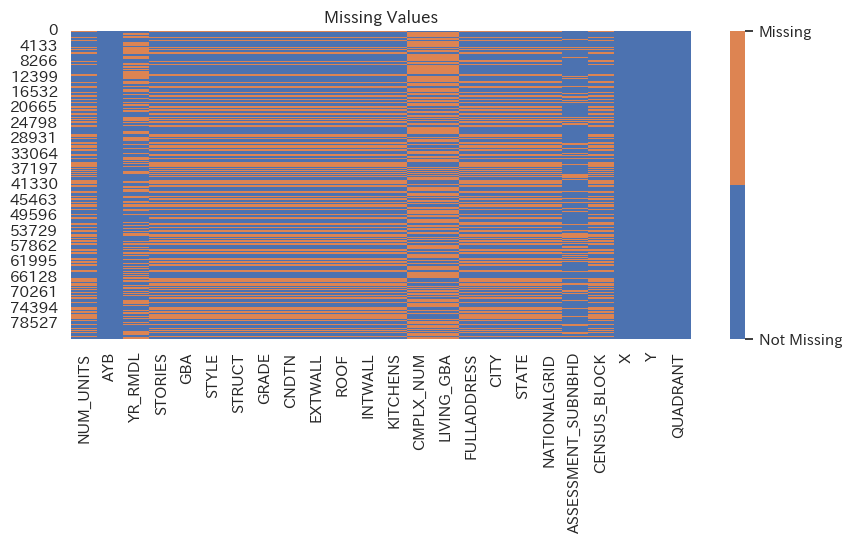

In [ ]:
# trainデータの欠損値をplotする
def missing_plot(df):
    cols_has_null = df.isnull().sum().to_frame(name="count").query("count > 0").index
    plt.figure(figsize=(10,4))
    cmap = sns.color_palette("deep", 2)
    ax = sns.heatmap(df[cols_has_null].isnull(), cmap=cmap)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0, 1])
    colorbar.set_ticklabels(['Not Missing','Missing'])
    plt.title("Missing Values")
    plt.show()

missing_plot(df_train)

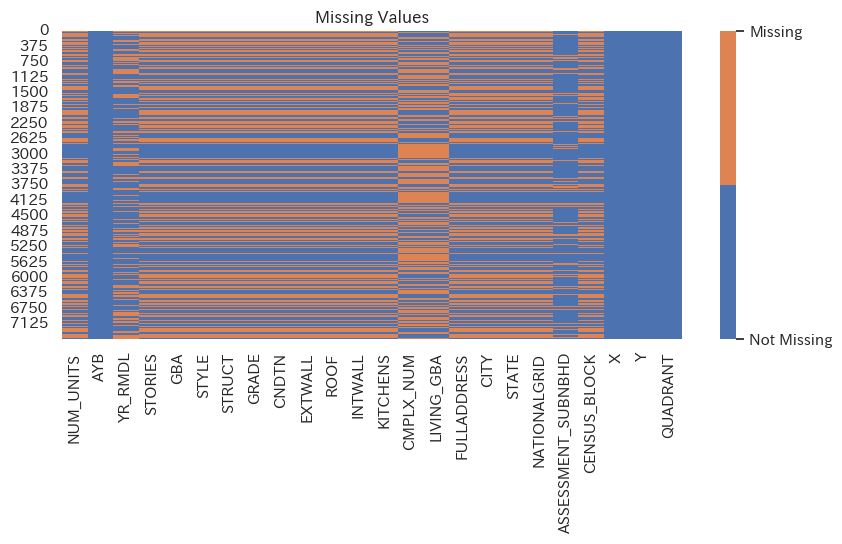

In [ ]:
# testデータの欠損値をplotする
missing_plot(df_test)

### **欠損値の状態から、変数がグループ化されてデータ投入管理がされている様子が分かる**

---
# 質的変数（qualitative variable）と量的変数（quantitative variable）
---

質的変数をカテゴリカル変数（カテゴリ変数）と呼ぶ  
質的データをカテゴリカルデータとも呼ぶ  


| 種類     |          | Python |
|-         |-         |-       |
| 質的変数 | 名義尺度 | object型 (str型) |
|          |          | Category型 (orderd = False) |
|          | 順序尺度 | Category型 (orderd = True) |
| 量的変数 | 比例尺度 | float型
|          |          | int型



## 変数の確認、加工方法例

In [ ]:
# 質的変数の確認
obj_var=df_train.dtypes[df_train.dtypes == 'object'].index
obj_var

Index(['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'GIS_LAST_MOD_DTTM', 'SOURCE',
       'FULLADDRESS', 'CITY', 'STATE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT'],
      dtype='object')

In [ ]:
# 数値変数（量的変数になる可能性のあるもの）
obj_var=df_train.dtypes[df_train.dtypes != 'object'].index
obj_var

Index(['Id', 'BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB',
       'YR_RMDL', 'EYB', 'STORIES', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'CMPLX_NUM', 'LIVING_GBA',
       'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'X', 'Y', 'PRICE'],
      dtype='object')

In [ ]:
# 質的変数の要素の確認
var = 'CNDTN'
df_train[var].value_counts()

Good         22163
Average      20915
Very Good     5168
Excellent      699
Fair           420
Poor            72
Default          3
Name: CNDTN, dtype: int64

In [ ]:
# 日付変換、月集約

# 日付フォーマット変換(月でまとめる)
# YYYY-MM-DD -> MM
var = 'SALEDATE'

# 月として追加する列名
var_sale_month = 'SALEMONTH'

# データコピー
df_tmp = df_train.copy()

# date型に変換して新しい列を追加
df_tmp[var_sale_month] = pd.to_datetime(df_tmp[var])

# 形式（フォーマット）変換（1月は01のように、月の頭に0が付くかつかないか注意）
# df_tmp[var_sale_month] = df_tmp[var_sale_month].dt.strftime('%m') # MM 形式 -> 01,02, ....,11,12
df_tmp[var_sale_month] = df_tmp[var_sale_month].dt.month # -> 1,2, .....,11,12

# データ表示
display(df_tmp.head())
print(df_tmp[var_sale_month].value_counts())

# 月の集約
# 1,2,9,10,11,12月を1に
# 3,4,8月を2に
# 5,6,7月を3に置き換える

mo_bins = {
    1:1,
    2:1,
    3:2,
    4:2,
    5:3,
    6:3,
    7:3,
    8:2,
    9:1,
    10:1,
    11:1,
    12:1
}

# 上記のマップを使って指定月を1,2,3に対応した数値を返す関数を定義する。

def get_bins(x):
    x = mo_bins[x]
    return x

df_tmp[var_sale_month] = df_tmp[var_sale_month].apply(get_bins)
# あるいは、map()を使って置き換える
# df_tmp[var_sale_month] = df_tmp[var_sale_month].map(mo_bins)

# データ表示
display(df_tmp.head())
print(df_tmp[var_sale_month].value_counts())

#df_tmp[var] = df_tmp[var].dt.strftime('%Y-%m') 　# YYYY-MM 形式に変える場合


,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,SALEMONTH
0,0,1,0,Hot Water Rad,N,1.0,6,3,1929.0,NaN,...,006 D Brightwood,1901.0,001901 4012,Ward 4,3197,-77.021356,38.967781,NW,60000.0,6
1,1,1,1,Warm Cool,Y,1.0,7,3,1940.0,NaN,...,NaN,9400.0,009400 1008,Ward 5,4232,-76.974953,38.942327,NE,75500.0,5
2,2,1,0,Forced Air,N,1.0,6,2,1947.0,NaN,...,016 A Congress Heights,9807.0,009807 2009,Ward 8,6239,-77.009976,38.824595,SW,40000.0,7
3,3,3,0,Hot Water Rad,N,1.0,6,3,1925.0,NaN,...,NaN,501.0,000501 1007,Ward 3,2206,-77.051444,38.926412,NW,173000.0,8
4,4,1,0,Wall Furnace,Y,NaN,3,1,1918.0,1979.0,...,036 A Mt. Pleasant,2701.0,NaN,Ward 1,2622,-77.037396,38.934158,NW,5400.0,6


6     8077
7     8004
8     7822
12    7516
5     7450
10    7098
9     7025
4     6670
11    6531
3     6134
1     5503
2     4823
Name: SALEMONTH, dtype: int64


,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,SALEMONTH
0,0,1,0,Hot Water Rad,N,1.0,6,3,1929.0,NaN,...,006 D Brightwood,1901.0,001901 4012,Ward 4,3197,-77.021356,38.967781,NW,60000.0,3
1,1,1,1,Warm Cool,Y,1.0,7,3,1940.0,NaN,...,NaN,9400.0,009400 1008,Ward 5,4232,-76.974953,38.942327,NE,75500.0,3
2,2,1,0,Forced Air,N,1.0,6,2,1947.0,NaN,...,016 A Congress Heights,9807.0,009807 2009,Ward 8,6239,-77.009976,38.824595,SW,40000.0,3
3,3,3,0,Hot Water Rad,N,1.0,6,3,1925.0,NaN,...,NaN,501.0,000501 1007,Ward 3,2206,-77.051444,38.926412,NW,173000.0,2
4,4,1,0,Wall Furnace,Y,NaN,3,1,1918.0,1979.0,...,036 A Mt. Pleasant,2701.0,NaN,Ward 1,2622,-77.037396,38.934158,NW,5400.0,3


1    38496
3    23531
2    20626
Name: SALEMONTH, dtype: int64


In [ ]:
# One-Hot-Encoding : 文字列のカテゴリ変数化

# カテゴリ変数の処理
# https://note.nkmk.me/python-pandas-get-dummies/
# カテゴリ変数をダミー変数に変換

var = 'CNDTN'
display(pd.get_dummies(df_train[var]).head())

# 第一引数にDataFrameを指定すると、
# デフォルトではデータ型dtypeが「object（主に文字列）またはcategory」の列がすべてダミー変数化される。
# 数値などの列はダミー変数化されない。
# DataFrameを指定した場合の列名は元の列名_カテゴリー名となる。

cols = ['ROOMS','GRADE','CNDTN']
X = df_train[cols].copy()
display(pd.get_dummies(X).head())

# 引数columnsにダミー変数化したい列の列名をリストで指定すると、数値やブールの列もダミー変数化できる。
# 指定しない列は変換されない。

display(pd.get_dummies(X, columns = cols).head())

# 最初のカテゴリーを除外 : 引数drop_first
# k個のカテゴリーをダミー変数化する場合、k-1個のダミー変数があればよいが、
# pd.get_dummies()ではデフォルトでk個のダミー変数に変換される。
# 引数drop_firstをTrueとすると、最初のカテゴリーが除外されk-1個のダミー変数に変換される。

display(pd.get_dummies(X, columns = cols, drop_first=True).head())


,Average,Default,Excellent,Fair,Good,Poor,Very Good
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0


,ROOMS,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,...,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good
0,6,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,6,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ROOMS_0,ROOMS_1,ROOMS_2,ROOMS_3,ROOMS_4,ROOMS_5,ROOMS_6,ROOMS_7,ROOMS_8,ROOMS_9,...,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ROOMS_1,ROOMS_2,ROOMS_3,ROOMS_4,ROOMS_5,ROOMS_6,ROOMS_7,ROOMS_8,ROOMS_9,ROOMS_10,...,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good,CNDTN_Default,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# pd.get_dummies()で複数のデータを変換する場合の注意点
# https://note.nkmk.me/python-pandas-get-dummies/
# df_train, df_testのように二つのDataFrameをpd.get_dummies()で変換する場合、
# 各データに含まれる要素が異なる可能性があり、結果として生成される列が異なってしまう。
# ダミー変数列を共通にするにはpandasのカテゴリ型を利用する。pd.Categorical()でカテゴリを指定して対象の列をカテゴリ型に変換する。

#df_A = pd.DataFrame({"name": ["Alice", "Bob", "Charlie"], "age" : [24, 42, 18], "state" : ["NY", "CA", "CA"], "point" : [64, 92, 70]})
#df_B = pd.DataFrame({"name": ["Dave", "Ellen", "Frank"], "age" : [24, 42, 18], "state" : ["TX", "CA", "NY"], "point" : [70, 88, 57]})

df_A = pd.DataFrame({"age" : [24, 42, 18], "state" : ["NY", "CA", "CA"], "point" : [64, 92, 70]})
df_B = pd.DataFrame({"age" : [24, 42, 18], "state" : ["TX", "CA", "NY"], "point" : [70, 88, 57]})

print(df_A)
#          age state  point
# name
# Alice     24    NY     64
# Bob       42    CA     92
# Charlie   18    CA     70

print(df_B)
#        age state  point
# name
# Dave    68    TX     70
# Ellen   24    CA     88
# Frank   30    NY     57

print(pd.get_dummies(df_A))
print(pd.get_dummies(df_B))

categories = set(df_A['state'].tolist() + df_B['state'].tolist())
print(categories)
# {'NY', 'TX', 'CA'}

df_A['state'] = pd.Categorical(df_A['state'], categories)
df_B['state'] = pd.Categorical(df_B['state'], categories)

print(df_A['state'].dtypes)

print(pd.get_dummies(df_A))
print(pd.get_dummies(df_B))

# 任意の要素をカテゴリとして指定することも可能。カテゴリに該当しない要素はNaNとして扱われる。
df_A = pd.DataFrame({"age" : [24, 42, 18], "state" : ["NY", "CA", "CA"], "point" : [64, 92, 70]})
df_B = pd.DataFrame({"age" : [24, 42, 18], "state" : ["TX", "CA", "NY"], "point" : [70, 88, 57]})

categories = ['CA', 'NY']
print(categories)

df_A['state'] = pd.Categorical(df_A['state'], categories)
df_B['state'] = pd.Categorical(df_B['state'], categories)

print(pd.get_dummies(df_A))
print(pd.get_dummies(df_B))


   age state  point
0   24    NY     64
1   42    CA     92
2   18    CA     70
   age state  point
0   24    TX     70
1   42    CA     88
2   18    NY     57
   age  point  state_CA  state_NY
0   24     64         0         1
1   42     92         1         0
2   18     70         1         0
   age  point  state_CA  state_NY  state_TX
0   24     70         0         0         1
1   42     88         1         0         0
2   18     57         0         1         0
{'TX', 'NY', 'CA'}
category
   age  point  state_TX  state_NY  state_CA
0   24     64         0         1         0
1   42     92         0         0         1
2   18     70         0         0         1
   age  point  state_TX  state_NY  state_CA
0   24     70         1         0         0
1   42     88         0         0         1
2   18     57         0         1         0
['CA', 'NY']
   age  point  state_CA  state_NY
0   24     64         0         1
1   42     92         1         0
2   18     70         1         0

In [ ]:
# カテゴリ変数として学習側の項目を指定する
# カテゴリ変数を明示的に事前に指定し、その後にget_dummiesを実行する。
# すると、もしその値がなくても、列は維持したまま、全部 0 の値が入れられる。

df_train_tmp = pd.DataFrame({"X": ["a", "b", "a"]})
df_test_tmp = pd.DataFrame({"X": ["a", "c", "a"]})

print('df_train_tmp')
display(df_train_tmp)
print('df_test_tmp')
display(df_test_tmp)

# そのままget_dummies
print(' ----- get_dummies() -----')
print('df_train_tmp')
display(pd.get_dummies(df_train_tmp))
print('df_test_tmp')
display(pd.get_dummies(df_test_tmp))

# カテゴリ変数として学習側の項目を指定する
categories_X = df_train_tmp['X'].unique()

df_train_tmp['X'] = pd.Categorical(df_train_tmp['X'], categories=categories_X)
df_test_tmp['X']  = pd.Categorical(df_test_tmp['X'], categories=categories_X)

print(' ----- categorie変数指定後 -----')
print('df_train_tmp')
display(df_train_tmp)
print('df_test_tmp')
display(df_test_tmp)

# そのままget_dummies
print(' ----- get_dummies() -----')
print('df_train_tmp')
display(pd.get_dummies(df_train_tmp))
print('df_test_tmp')
display(pd.get_dummies(df_test_tmp))

# 学習データに合わせた形でone-hotencodingされる

df_train_tmp


,X
0,a
1,b
2,a


df_test_tmp


,X
0,a
1,c
2,a


 ----- get_dummies() -----
df_train_tmp


,X_a,X_b
0,1,0
1,0,1
2,1,0


df_test_tmp


,X_a,X_c
0,1,0
1,0,1
2,1,0


 ----- categorie変数指定後 -----
df_train_tmp


,X
0,a
1,b
2,a


df_test_tmp


,X
0,a
1,NaN
2,a


 ----- get_dummies() -----
df_train_tmp


,X_a,X_b
0,1,0
1,0,1
2,1,0


df_test_tmp


,X_a,X_b
0,1,0
1,0,0
2,1,0


In [ ]:
# Ordinal Encoding (Label Encoding)
# カテゴリ変数に大小の意味を持たせたい場合に使用する。
# 例： テストの結果に基づいた評定 { '90点以上' :'S',　'80 ~ 89点' :'A',　'70 ~ 79点' :'B', '70点未満' : 'C' } の時は大小関係に意味がある。

# カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)
# https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf

# sklearn.preprocessing.OrdinalEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
print('---------------')
print('Ordinal Encoder')
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame([['black','yes'],
                   ['white', 'no'],
                  ['yellow', 'no'],
                  ['black', 'yes']], columns=['label', 'binary'])
oe = OrdinalEncoder()

df.loc[:,['labelEncoded', 'binaryEncoded']] = oe.fit_transform(df)
print(df)

# sklearn.preprocessing.LabelEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
print('---------------')
print('Label Encoder')
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(['black', 'white', 'yellow', 'black'], columns=['label'])
le = LabelEncoder()

df['encoded'] = le.fit_transform(df['label'])
print(df)

# sklearn.preprocessing.LabelBinarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
print('---------------')
print('Label Binarizer')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df = pd.DataFrame(['no', 'yes', 'yes', 'no'], columns=['binary'])

df['encoded'] = lb.fit_transform(df['binary'])
print(df)

---------------
Ordinal Encoder
    label binary  labelEncoded  binaryEncoded
0   black    yes           0.0            1.0
1   white     no           1.0            0.0
2  yellow     no           2.0            0.0
3   black    yes           0.0            1.0
---------------
Label Encoder
    label  encoded
0   black        0
1   white        1
2  yellow        2
3   black        0
---------------
Label Binarizer
  binary  encoded
0     no        0
1    yes        1
2    yes        1
3     no        0


In [ ]:
# 質的変数のカテゴリ結合
var = 'CNDTN'

A = df_train.copy()

display(A[var].value_counts())

#    A[行, 列]
A.loc[(A[var] != 'Excellent') & (A[var] != 'Very Good') & (A[var] != 'Good'), var] ='Other'
display(A[var].value_counts())

#    A[行, 列]
A.loc[(A[var] != 'Excellent') & (A[var] != 'Very Good'), var] ='Other'
display(A[var].value_counts())

#    A[行, 列]
A.loc[A[var] != 'Excellent', var] ='Other'
display(A[var].value_counts())


Good         22163
Average      20915
Very Good     5168
Excellent      699
Fair           420
Poor            72
Default          3
Name: CNDTN, dtype: int64

Other        54623
Good         22163
Very Good     5168
Excellent      699
Name: CNDTN, dtype: int64

Other        76786
Very Good     5168
Excellent      699
Name: CNDTN, dtype: int64

Other        81954
Excellent      699
Name: CNDTN, dtype: int64

In [ ]:
# scikit-learn数値系特徴量の前処理まとめ(Feature Scaling)
# https://qiita.com/FukuharaYohei/items/7508f2146c63ffe16b1e


In [ ]:
# 数値変換
# https://qiita.com/tk-tatsuro/items/86c0a9ff744f73ad1832

# 特徴量生成のパターン（数値変換）
# 単一変数
# 二値化、離散化（ビニング）、分位化、べき乗、スケール変換、対数変換、Box-Cox変換、ロジット変換、Yeo-Johnson変換
# 数学関数による変換（log関数、exp関数、sin関数、cos関数）

# 複数変数
# 四則演算（交互作用項・非線形特徴量）、主成分分析、特異値分解、クラスター分析

# 数値変数の問題
# 1.スケールが異なる特徴量
# 各特徴量間のスケールが大きく異なる場合、機械学習のアルゴリズムは同じスケールのデータを扱うことを前提としており、システムはその数値の大小をそのまま学習してしまい、予期せぬ解釈をしてしまう可能性があります。その為、スケール変換を行い、事前にスケールを調整する必要があります。

# 2.歪んだ分布
# 線形回帰モデルでは、出力から得られる値の誤差が正規分布に従うことを仮定しているため、例えば、部分最小二乗法を用いることで説明変数の相関を無相関化するなどの対応が必要になる場合があります。

# 3.変数間で、線形では表現できないような複雑な関係を持つデータ
# データ自体の説明力が強まることがある反面、過学習（オーバーフィッティング）を引き起こす可能性があります。

# 4.外れ値
# k近傍法やサポートベクターマシンは、特徴空間上の外れ値の影響を受けやすい性質があります。アルゴリズムの性質上、データポイント間の距離を捉えており、外れ値が含まれる場合、近傍点の探索や、または境界分離の際の解釈が外れ値に引っ張られる可能性があります。その為、不要な外れ値（異常値）は事前に除去する必要があります。
# ただし、実際の値ではなく順位化されたデータを利用する木ベースのモデルでは外れ値の影響を軽減可能です。

# 5.冗長な情報
# 重複や不要なデータ（ノイズ）が多く含まれている場合、過学習の危険性が生まれる為、データの簡略化、置換、圧縮等の処理が必要となります。
# このような様々な問題に対応する為、数値を適切な形に変換する方法が数多くあります。


In [ ]:
# 欠損値補完：平均
A=pd.read_csv('./data/DC_train.csv')
pd.set_option('display.max_columns', 100)

A.loc[A['GBA'].isnull()==True,'GBA']=A['GBA'].mean()

In [ ]:
# 欠損値補完： 0置換
A=pd.read_csv('./data/DC_train.csv')
A.loc[A['GBA'].isnull()==True,'GBA']=0

# fillna()を使うともっと楽に書ける
A=pd.read_csv('./data/DC_train.csv')
A['GBA'] = A['GBA'].fillna(0)

In [ ]:
# 欠損値補完：カラム削除
A=pd.read_csv('./data/DC_train.csv')
A.drop('GBA',axis=1,inplace=True)

In [ ]:
# 離散化(ビニング、ビン分割)
# pandasのcut, qcut関数でビニング処理（ビン分割）
# https://note.nkmk.me/python-pandas-cut-qcut-binning/

In [ ]:
# 量的変数の処理
# 量的変数のbin作成例（ビニング例）

# 近所ID : (No.39) ASSESSMENT_NBHD の物件価格中央値を用いて分類

A=pd.read_csv('./data/DC_train.csv')

neighbor_price = dict(A['PRICE'].groupby(A['ASSESSMENT_NBHD']).median())

A['neighbor_bins'] = 0

for i in neighbor_price:
    if neighbor_price[i] <= 100000:
        neighbor_price[i] = 1
    elif (neighbor_price[i] > 100000) & (neighbor_price[i] <= 200000):
        neighbor_price[i] = 2
    elif (neighbor_price[i] > 200000) & (neighbor_price[i] <= 300000):
        neighbor_price[i] = 3
    else:
        neighbor_price[i] = 4

for i in neighbor_price:
    A.loc[A['ASSESSMENT_NBHD'] == i, 'neighbor_bins'] = neighbor_price[i]

A.loc[:,['ASSESSMENT_NBHD', 'neighbor_bins']].head(10)


,ASSESSMENT_NBHD,neighbor_bins
0,Brightwood,4
1,Michigan Park,4
2,Congress Heights,2
3,Garfield,4
4,Mt. Pleasant,4
5,Anacostia,2
6,Chevy Chase,4
7,Columbia Heights,4
8,Hillcrest,2
9,Brookland,4


In [ ]:
# 特徴量エンジニアリング
# 予測の精度向上に貢献しそうな新しい変数を追加していく
# 例：建物内の総面積 = 1階の面積 + 2階の面積 + 地下の面積

"""
# 特徴量エンジニアリングによりカラムを追加する関数
def add_new_columns(df):
    # 建物内の総面積 = 1階の面積 + 2階の面積 + 地下の面積
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

    # 一部屋あたりの平均面積 = 建物の総面積 / 部屋数
    df['AreaPerRoom'] = df['TotalSF']/df['TotRmsAbvGrd']

    # 築年数 + 最新リフォーム年 : この値が大きいほど値段が高くなりそう
    df['YearBuiltPlusRemod']=df['YearBuilt']+df['YearRemodAdd']

    # お風呂の総面積
    # Full bath : 浴槽、シャワー、洗面台、便器全てが備わったバスルーム
    # Half bath : 洗面台、便器が備わった部屋)(シャワールームがある場合もある)
    # シャワーがない場合を想定してHalf Bathには0.5の係数をつける
    df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

    # 合計の屋根付きの玄関の総面積
    # Porch : 屋根付きの玄関 日本風にいうと縁側
    df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

    # プールの有無
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

    # 2階の有無
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

    # ガレージの有無
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

    # 地下室の有無
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

    # 暖炉の有無
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# カラムを追加
add_new_columns(all_df)
"""